# Step 1: Define the Problem
For this project, the problem statement is given to us on a golden plater, develop an algorithm to predict the survival outcome of passengers on the Titanic.

......

**Project Summary:**
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


# Step 2: Gather the Data

The dataset is also given to us on a golden plater with test and train data at [Kaggle's Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)


<a id="ch4"></a>
# Step 3: Prepare Data for Consumption
Since step 2 was provided to us on a golden plater, so is step 3. Therefore, normal processes in data wrangling, such as data architecture, governance, and extraction are out of scope. Thus, only data cleaning is in scope.

## 3.1 Import Libraries
The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks. The idea is why write ten lines of code, when you can write one line. 

In [13]:
#load packages
import sys
import pandas as pd
import matplotlib 
import numpy as np 
import scipy as sp 
import sklearn 

#misc libraries
import random
import time


## 3.11 Load Data Modelling Libraries

We will use the popular *scikit-learn* library to develop our machine learning algorithms. In *sklearn,* algorithms are called Estimators and implemented in their own classes. For data visualization, we will use the *matplotlib* and *seaborn* library. Below are common classes to load.

In [14]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8
%config InlineBackend.figure_format='retina'

## 3.2 Meet and Greet Data

This is the meet and greet step. Get to know your data and learn a little bit about it. What does it look like (datatype and values), what makes it tick (independent/feature variables(s)), what's its goals (dependent/target variable(s)).

1- To begin this step, we first import our data. 

2- Next we use the info() and sample() function, to get a quick and dirty overview of variable datatypes (i.e. qualitative vs quantitative). 

3- Try to understand the features (take a look at the data dictionary and understand the meaning of each one)


In [15]:
data_raw = pd.read_csv('data/train.csv')

#a dataset should be broken into 3 splits: train, test, and (final) validation
#the test file provided is the validation file for competition submission
#we will split the train set into train and test data in future sections
data_val  = pd.read_csv('data/test.csv')
data1 = data_raw.copy(deep = True)

#however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1, data_val]


#preview data
data_raw.info()
data_raw.head() 
#data_raw.tail()
# data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
data_raw[~(data_raw['Pclass']==1) & ~(data_raw['Cabin'].isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S


In [17]:
data_raw[~data_raw['Sex'].isin(['male','female'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [18]:
data_raw.groupby('Sex').count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [19]:
data_raw[data_raw['Age'].isnull() & data_raw['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


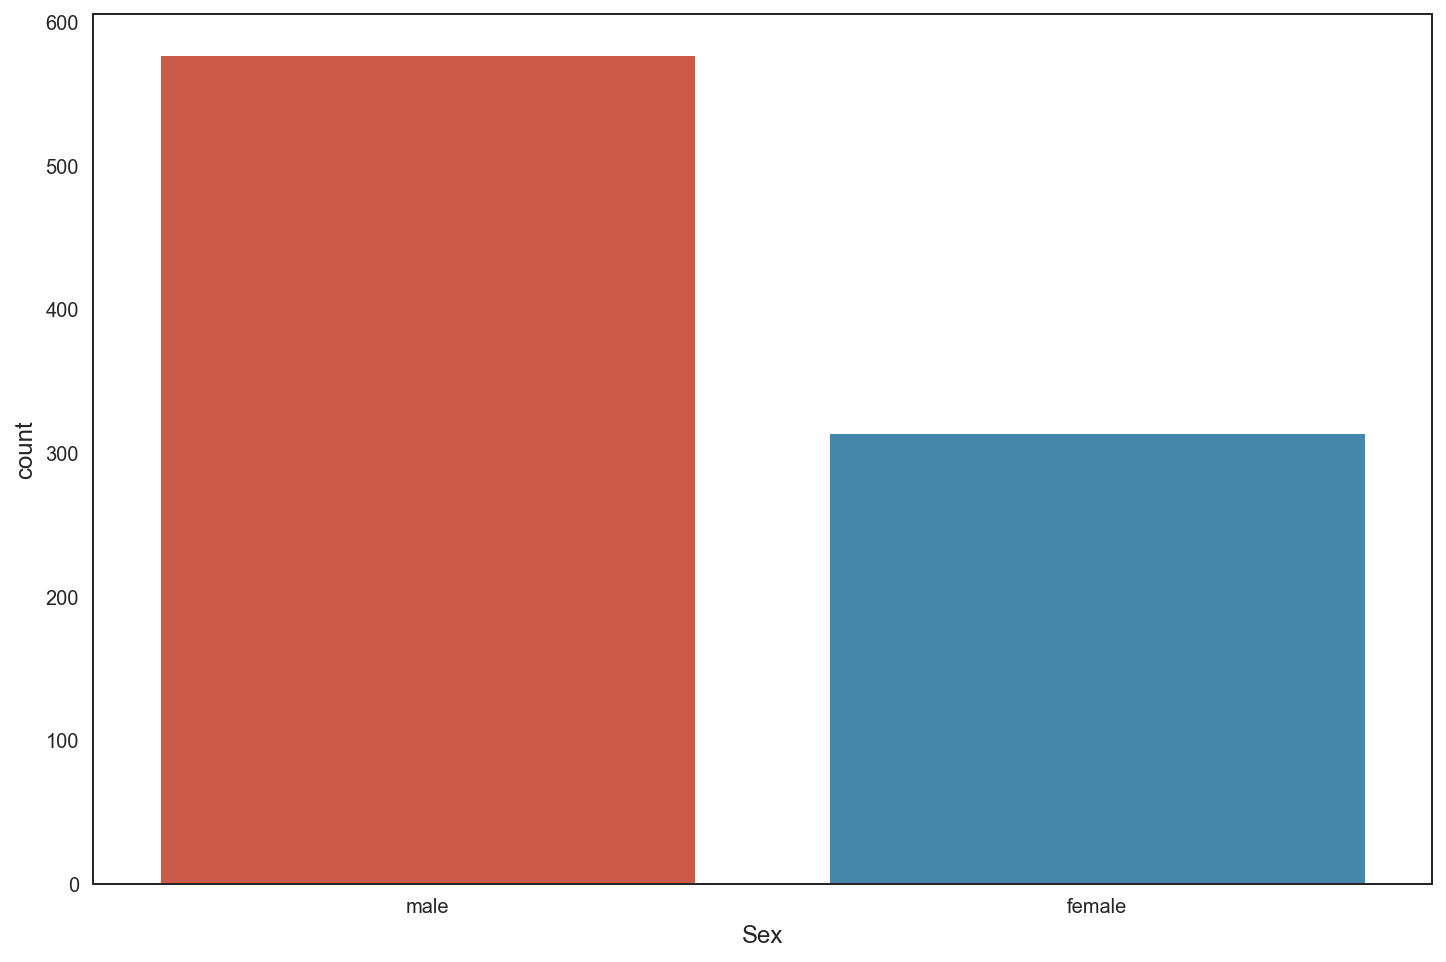

In [20]:
sns.countplot(x='Sex', data=data_raw);

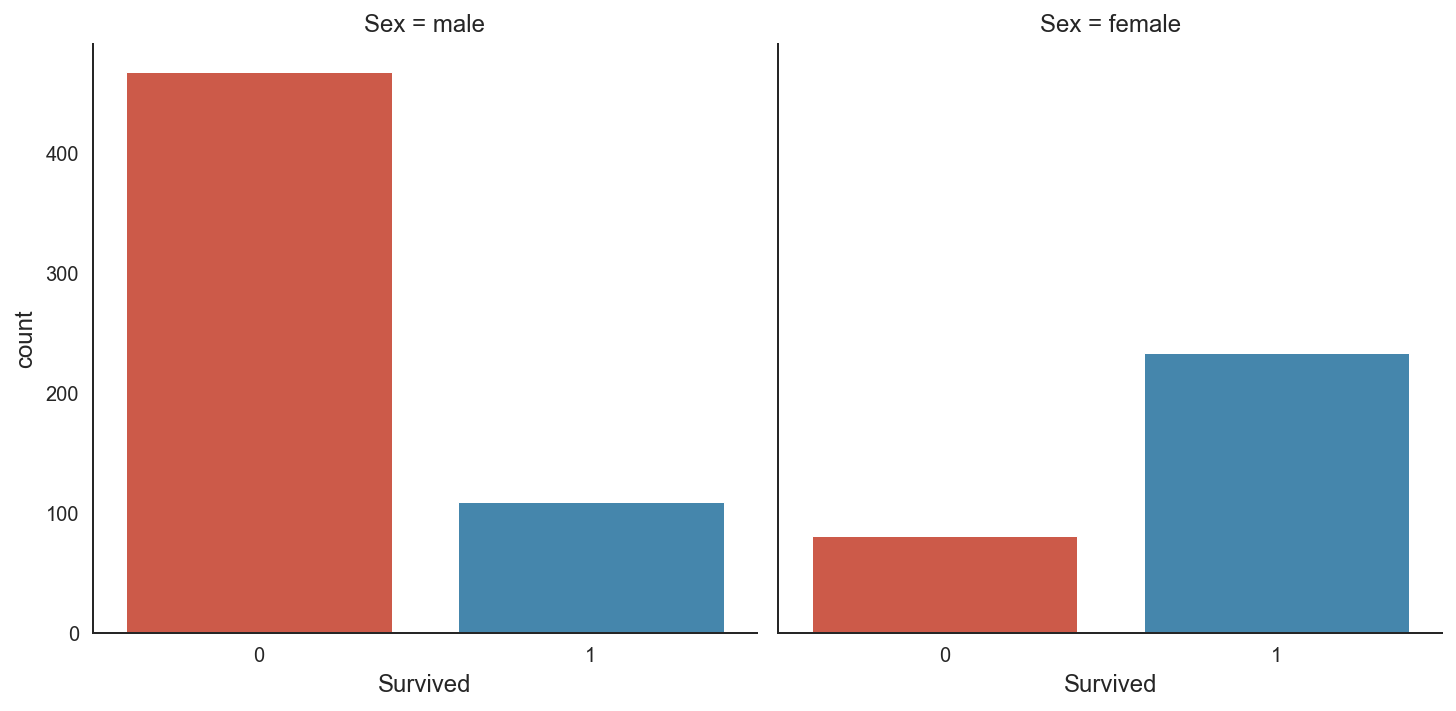

In [21]:
g=sns.catplot(x='Survived', col='Sex', kind='count', data=data_raw);

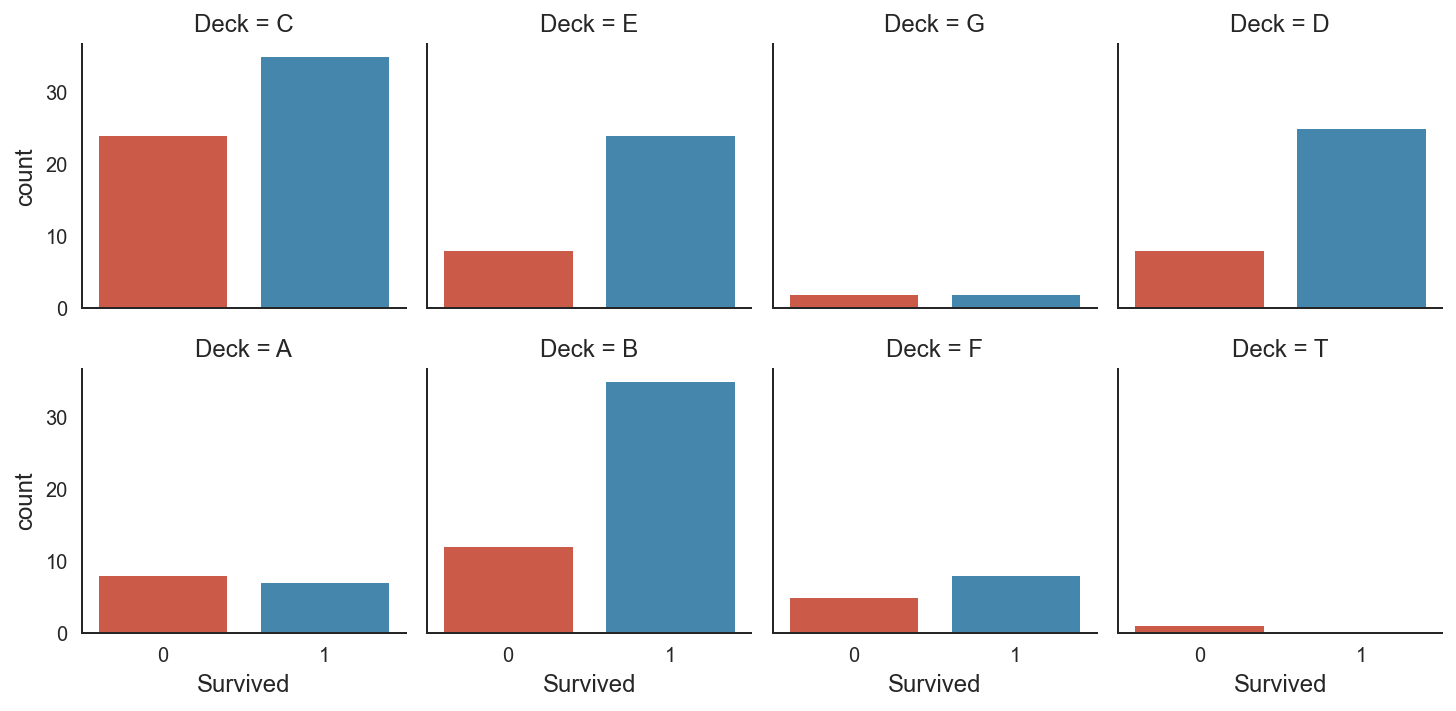

In [22]:
data2=data_raw.copy(deep=True)
data2['Deck']=data2['Cabin'].str[0]
# data2
sns.catplot(x="Survived", col="Deck", col_wrap=4, data=data2, kind="count", height=2.5)

In [23]:
data2[data2['Deck']=='T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,T


In [24]:
import re

data3 = data2[data2['Name'].str.contains('Jack' , regex=True)]
data3
# It seems Titanic movie is not real!

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Deck
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6,NaN,C,NaN


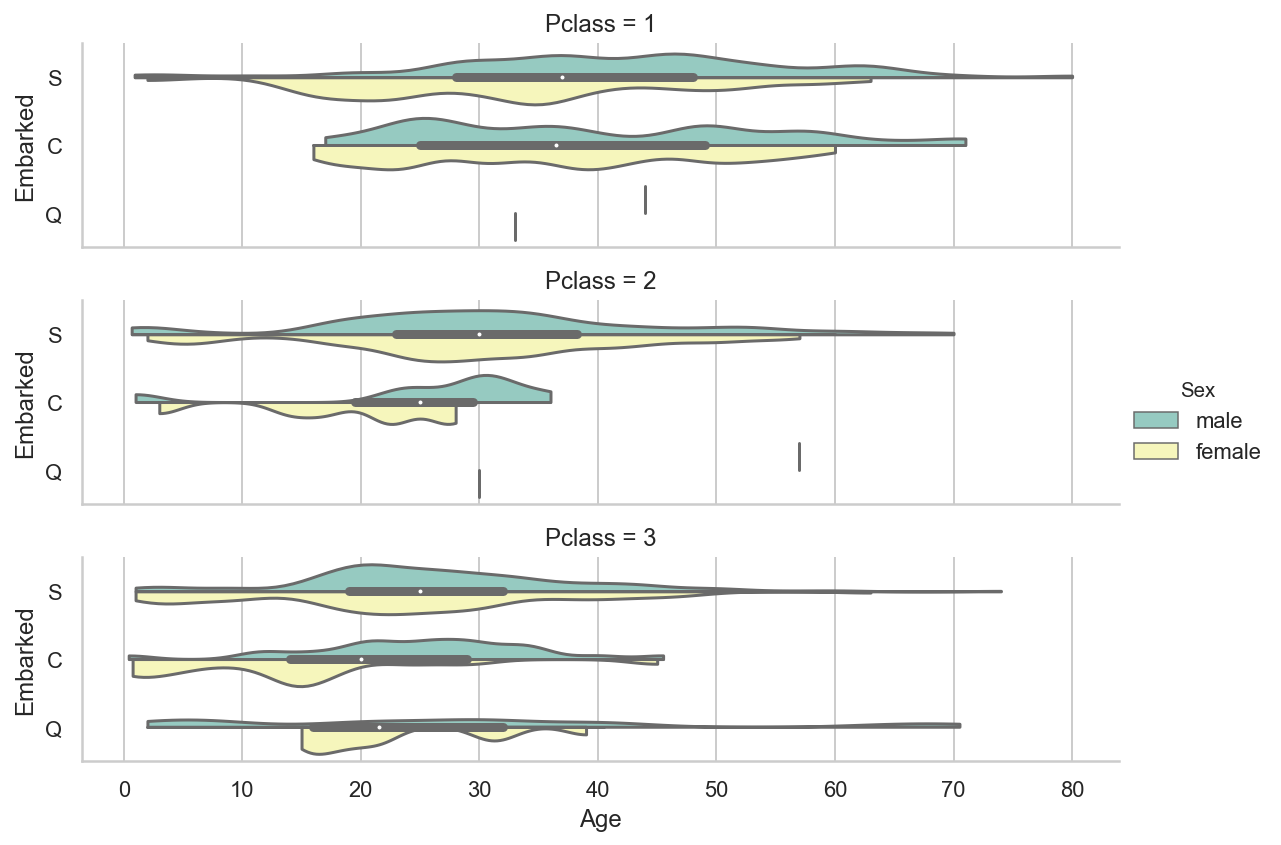

In [25]:
sns.set(style="whitegrid")
g= sns.catplot(x="Age", y="Embarked", hue="Sex", row="Pclass",
                data=data2,
                orient="h", height=2, aspect=4, palette="Set3",
                kind="violin",cut=0,  bw=0.2, split=True) #cut =0 limits the graph to the actual data range and bw is the bandwidth

# see params here: https://seaborn.pydata.org/generated/seaborn.violinplot.html

Let $(x_1, \dots, x_n)$ be the observation.
The following function is the estimator for Violin diagram Kernel Density Estimation:

${\displaystyle {\widehat {f}}_{h}(x)={\frac {1}{n}}\sum _{i=1}^{n}K_{h}(x-x_{i})={\frac {1}{nh}}\sum _{i=1}^{n}K{\Big (}{\frac {x-x_{i}}{h}}{\Big )},}$

                                                                                                                        
where $K$ is the kernel function (a non-negative function) and
$h > 0$ is a smoothing parameter called the bandwidth. A kernel with subscript $h$ is called the scaled kernel.
                                                                                                                        
See here for more details: https://en.wikipedia.org/wiki/Kernel_density_estimation

A typical kernel function is the Normal distribution, with mean on each data point and standard deviation of 1:
${\displaystyle K(x)={\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}}}$

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packag

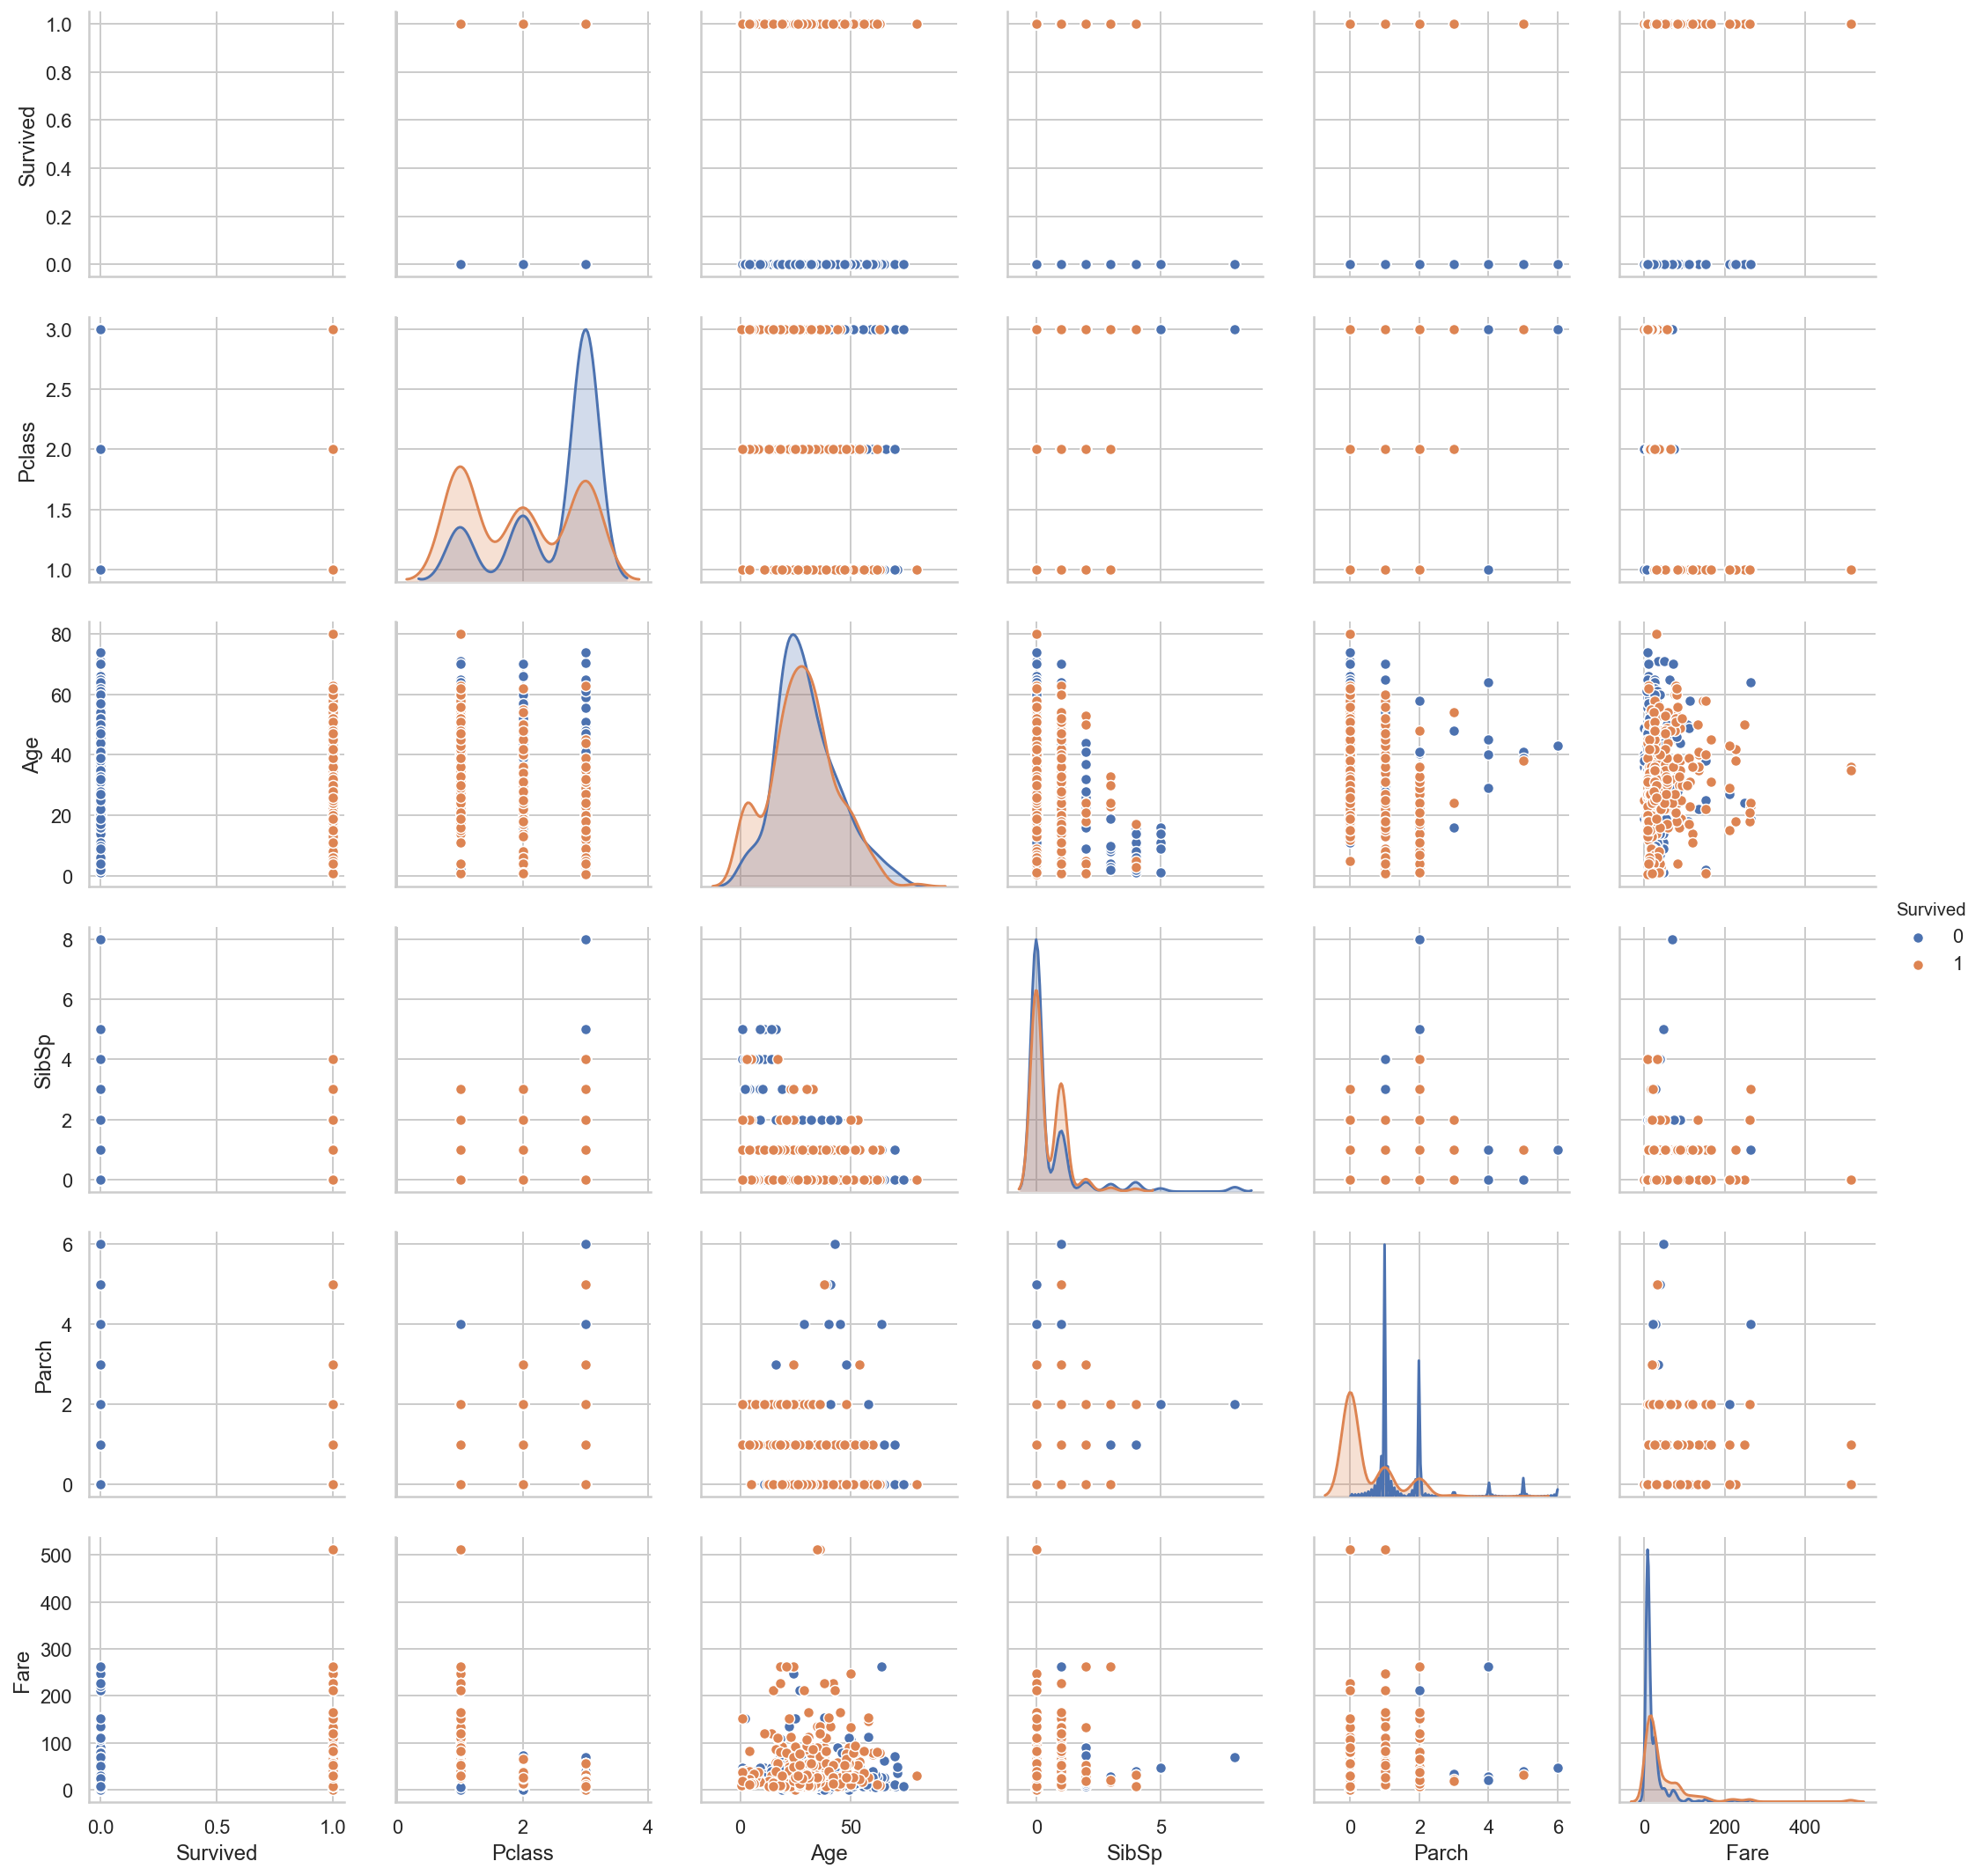

In [26]:
data3=data2[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
sns.pairplot(data=data3, hue='Survived')

## 3.3 The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting
In this stage, we will clean our data by 1) correcting bad values and outliers, 2) completing missing information, 3) creating new features for analysis, and 4) converting fields to the correct format for calculations and presentation.

1. **Correcting:** Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs. In addition, we see we may have potential outliers in age and fare. However, since they are reasonable values, we will wait until after we complete our exploratory analysis to determine if we should include or exclude from the dataset. It should be noted, that if they were unreasonable values, for example age = 800 instead of 80, then it's probably a safe decision to fix now. However, we want to use caution when we modify data from its original value, because it may be necessary to create an accurate model.
2. **Completing:** There are null values or missing data in the age, cabin, and embarked field. Missing values can be bad, because some algorithms don't know how-to handle null values and will fail. While others, like decision trees, can handle null values. Thus, it's important to fix before we start modeling, because we will compare and contrast several models. There are two common methods, either delete the record or populate the missing value using a reasonable input. It is not recommended to delete the record, especially a large percentage of records, unless it truly represents an incomplete record. Instead, it's best to impute missing values. A basic methodology for qualitative data is impute using mode. A basic methodology for quantitative data is impute using mean, median, or mean + randomized standard deviation. An intermediate methodology is to use the basic methodology based on specific criteria; like the average age by class or embark port by fare and SES. There are more complex methodologies, however before deploying, it should be compared to the base model to determine if complexity truly adds value. **For this dataset, age will be imputed with the median, the cabin attribute will be dropped, and embark will be imputed with mode.** Subsequent model iterations may modify this decision to determine if it improves the model’s accuracy.
3. **Creating:**  Feature engineering is when we use existing features to create new features to determine if they provide new signals to predict our outcome. For this dataset, we will create a title feature to determine if it played a role in survival.
4. **Converting:** Last, but certainly not least, we'll deal with formatting. There are no date or currency formats, but datatype formats. Our categorical data imported as objects, which makes it difficult for mathematical calculations. For this dataset, we will convert object datatypes to categorical dummy variables.

In [27]:
import warnings
warnings.filterwarnings('ignore')

pylab.rcParams['figure.figsize'] = 20,12
sns.set(style="whitegrid")


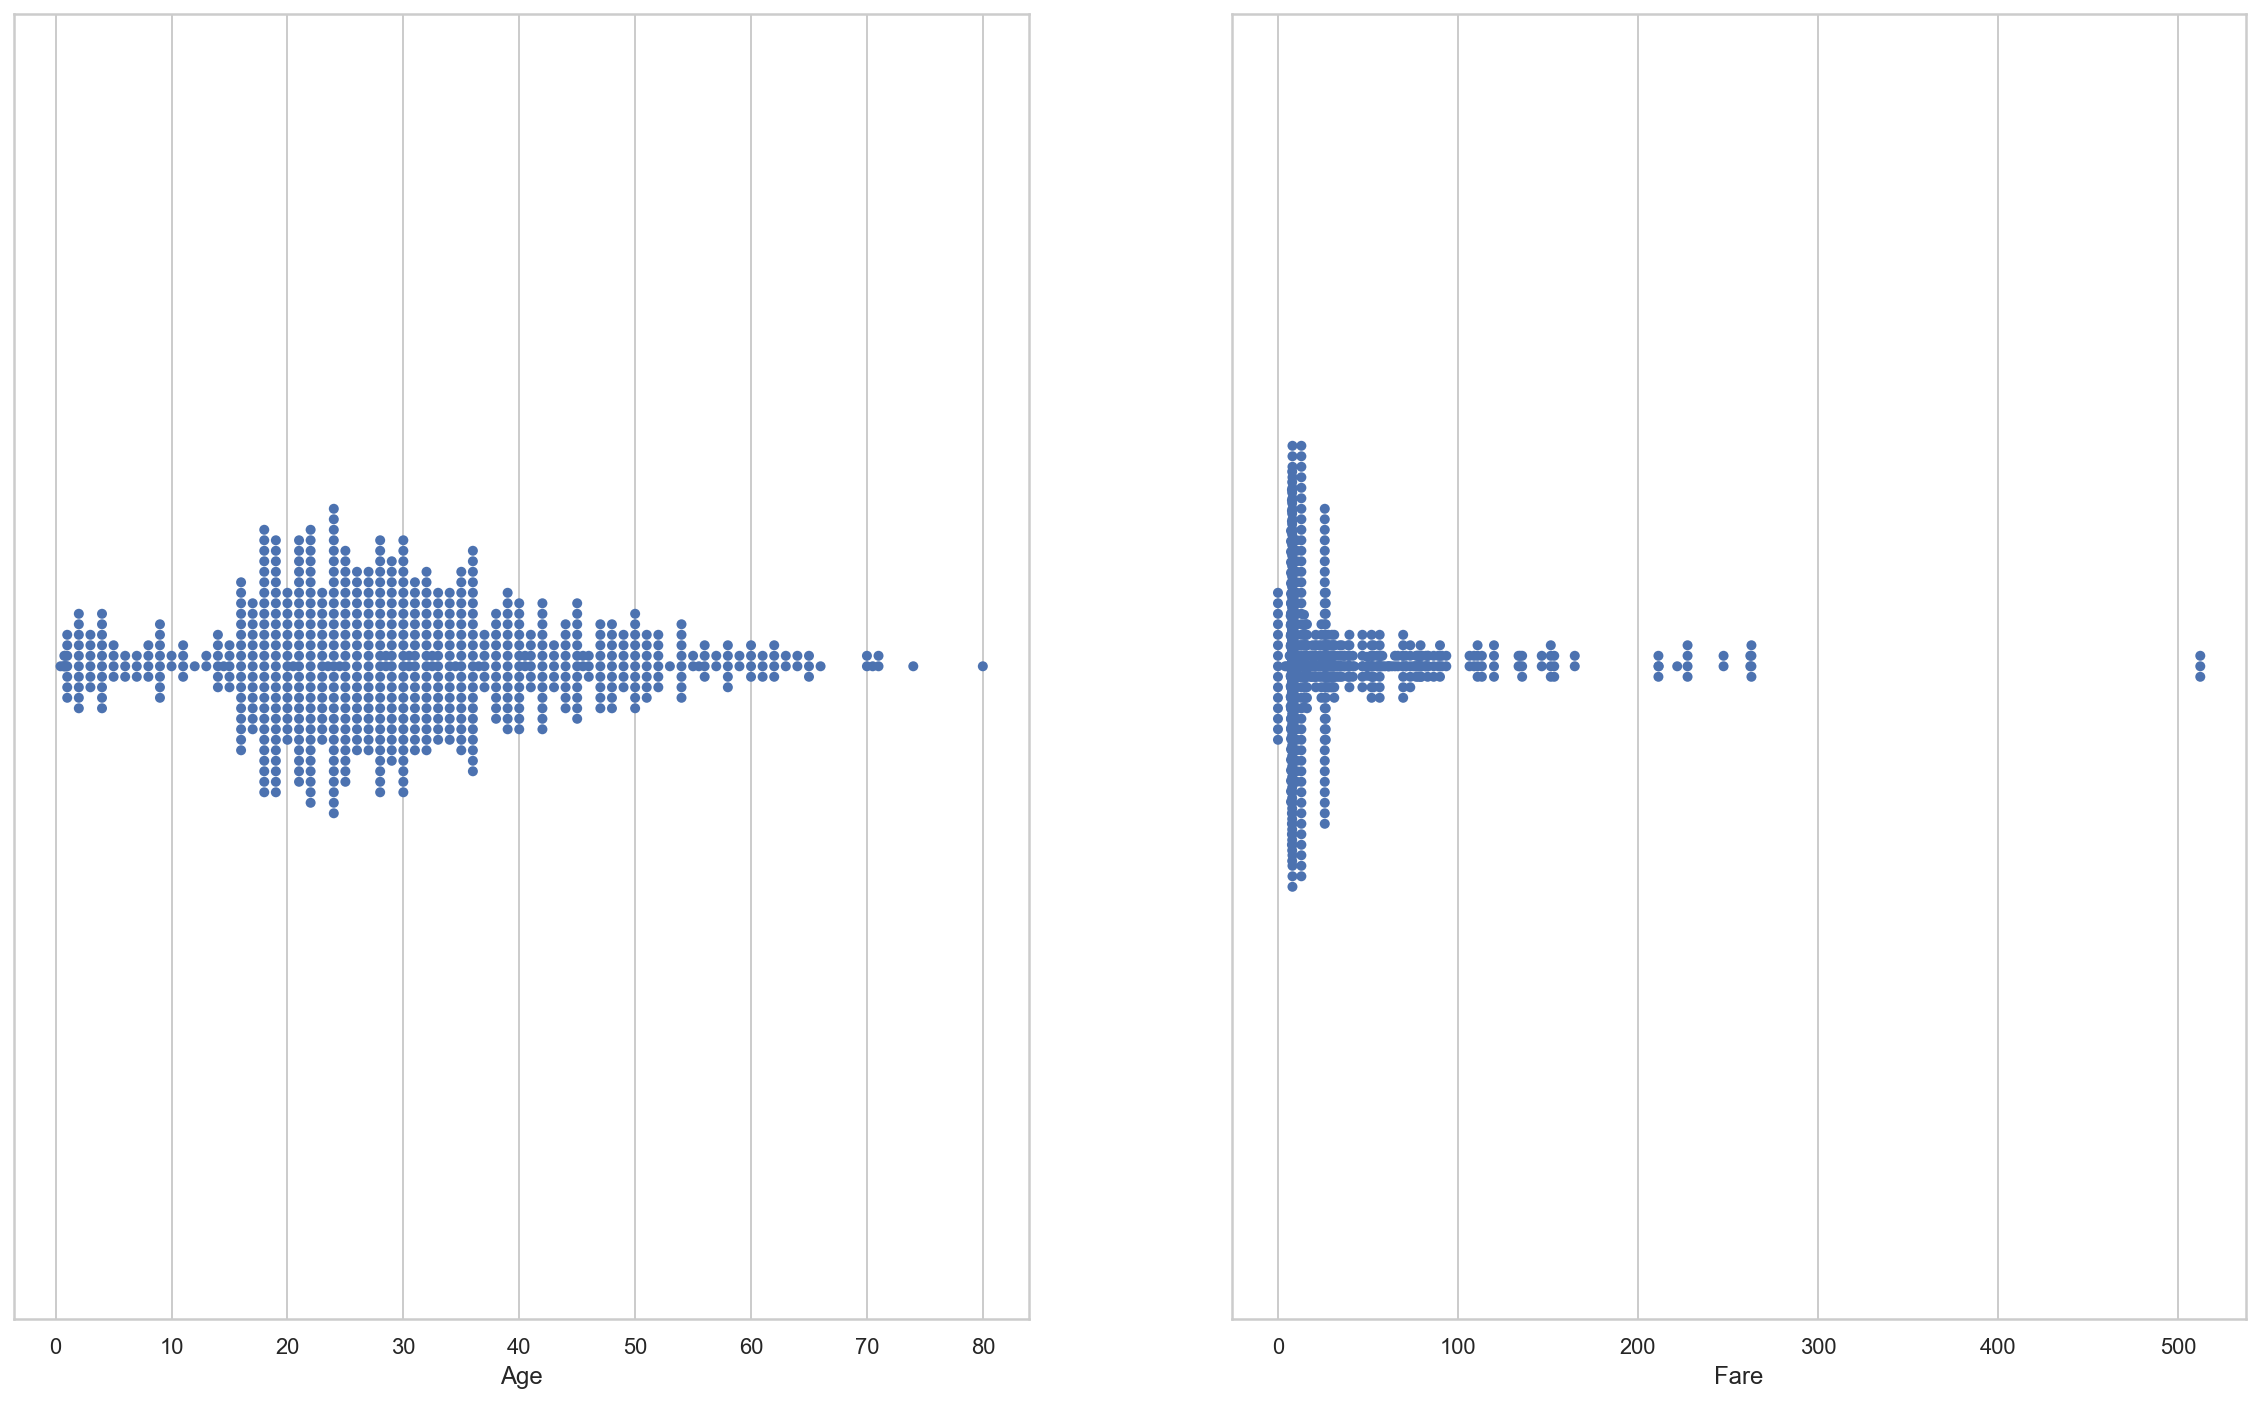

In [28]:
fig, ax =plt.subplots(1,2)
sns.swarmplot(x=data_raw['Age'], ax=ax[0])
sns.swarmplot(x=data_raw['Fare'], ax=ax[1])
fig.show()

In [29]:
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Kallio, Mr. Nikolai Erland",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [30]:
###COMPLETING: complete or delete missing values in train and test/validation dataset
for dataset in data_cleaner:    
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)     #complete missing age with median
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)     #complete embarked with mode
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)    #complete missing fare with median
    
    #delete the cabin feature/column and others previously stated to exclude in train dataset
    drop_column = ['PassengerId','Cabin', 'Ticket']
    dataset.drop(drop_column, axis=1, inplace = True)

print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [31]:
###CREATE: Feature Engineering for train and test/validation dataset
for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

    #Fare Bins using quantile-cut or frequency bins (euqal number of data points in each): https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4) #the ouput has a Category type

    #Age Bins using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)

data1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,1,Rev,"(7.91, 14.454]","(16.0, 32.0]"
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,1,Miss,"(14.454, 31.0]","(16.0, 32.0]"
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,4,0,Miss,"(14.454, 31.0]","(16.0, 32.0]"
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]"


## sample size determination in statistics (to remove small groups of samples):
https://en.wikipedia.org/wiki/Sample_size_determination

https://en.wikipedia.org/wiki/Effect_size#Cohen's_d

http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/

For confidence level 95% you can use the following table to determine the sample size: 

| Power | Cohen's d: 0.2 | 0.5 | 0.8 |
| --- | --- | --- | ---- | 
| 0.25 | 84	| 14 | 6 |
| 0.50 | 193 |	32 |	13 |
| 0.60 | 246  |	40 |	16 |
| 0.70 | 310 |	50 |	20 |
| 0.80 | 393 |	64 |	26 |
| 0.90 | 526 |	85 |	34 |
| 0.95 | 651 |	105 |	42 |
| 0.99 | 920 |	148 |	58 |

In [32]:
#cleanup rare title names
# print(data1['Title'].value_counts())
stat_min = 13  
title_names = (data1['Title'].value_counts() < stat_min) #create mask

data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)


#preview data again
data1.info()
data_val.info()
data1.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
Pclass        418 non-null int64
Name          418 non-null object
Sex           418 non-null object
Age           418 non-null flo

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
346,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,13.0000,S,1,1,Miss,"(7.91, 14.454]","(32.0, 48.0]"
561,0,3,"Sivic, Mr. Husein",male,40.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(32.0, 48.0]"
271,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,0.0000,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
751,1,3,"Moor, Master. Meier",male,6.0,0,1,12.4750,S,2,0,Master,"(7.91, 14.454]","(-0.08, 16.0]"
236,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26.0000,S,2,0,Mr,"(14.454, 31.0]","(32.0, 48.0]"
684,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,39.0000,S,3,0,Mr,"(31.0, 512.329]","(48.0, 64.0]"
549,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,36.7500,S,3,0,Master,"(31.0, 512.329]","(-0.08, 16.0]"
534,0,3,"Cacic, Miss. Marija",female,30.0,0,0,8.6625,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
72,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,73.5000,S,1,1,Mr,"(31.0, 512.329]","(16.0, 32.0]"
55,1,1,"Woolner, Mr. Hugh",male,28.0,0,0,35.5000,S,1,1,Mr,"(31.0, 512.329]","(16.0, 32.0]"


## Convert Formats

We will convert categorical data to dummy variables for mathematical analysis. There are multiple ways to encode categorical variables; we will use the sklearn and pandas functions.

** Developer Documentation: **
* [Categorical Encoding](http://pbpython.com/categorical-encoding.html)
* [Sklearn LabelEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
* [Sklearn OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)
* [Pandas Categorical dtype](https://pandas.pydata.org/pandas-docs/stable/categorical.html)
* [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)

Also, read about dummy variables trap here: https://towardsdatascience.com/one-hot-encoding-multicollinearity-and-the-dummy-variable-trap-b5840be3c41a

In [33]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

data1.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,4,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,4,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,3,2,1


In [34]:
#define y variable aka target/outcome
Target = ['Survived']

#define x variables for original features
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')




Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 



In [35]:

#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')



data1_dummy.head()

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [36]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

data1.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null catego

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
count,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891.000000,891,891.000000,891.000000,891,891,891,891.000000,891.000000,891.000000,891.000000,891.000000
unique,NaN,NaN,891,2,NaN,NaN,NaN,NaN,3,NaN,NaN,5,4,5,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,"Kallio, Mr. Nikolai Erland",male,NaN,NaN,NaN,NaN,S,NaN,NaN,Mr,"(7.91, 14.454]","(16.0, 32.0]",NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,577,NaN,NaN,NaN,NaN,646,NaN,NaN,517,224,525,NaN,NaN,NaN,NaN,NaN
mean,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,32.204208,NaN,1.904602,0.602694,NaN,NaN,NaN,0.647587,1.536476,2.740741,1.288440,1.497194
std,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,49.693429,NaN,1.613459,0.489615,NaN,NaN,NaN,0.477990,0.791503,0.896379,0.812038,1.118156
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,7.910400,NaN,1.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2.000000,1.000000,0.500000
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,14.454200,NaN,1.000000,1.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,1.000000,1.000000
75%,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,31.000000,NaN,2.000000,1.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,2.000000,2.000000


## Split Training and Testing Data

[*sklearn's* train_test_split function](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


[*sklearn's* cross validation functions](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)

In [37]:
import sklearn.model_selection as ms

In [38]:
# random_state is the psudo-random seed of split function
train1_x, test1_x, train1_y, test1_y = ms.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0) 
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = ms.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = ms.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


# Step 4: Perform Exploratory Analysis with Statistics


In [39]:
#Discrete Variable Correlation by Survival using

for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        

#using crosstabs: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html
print(pd.crosstab(data1['Title'],data1[Target[0]]))


Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by: FamilySize
   FamilySize  Survived
0           1  0.303538
1 

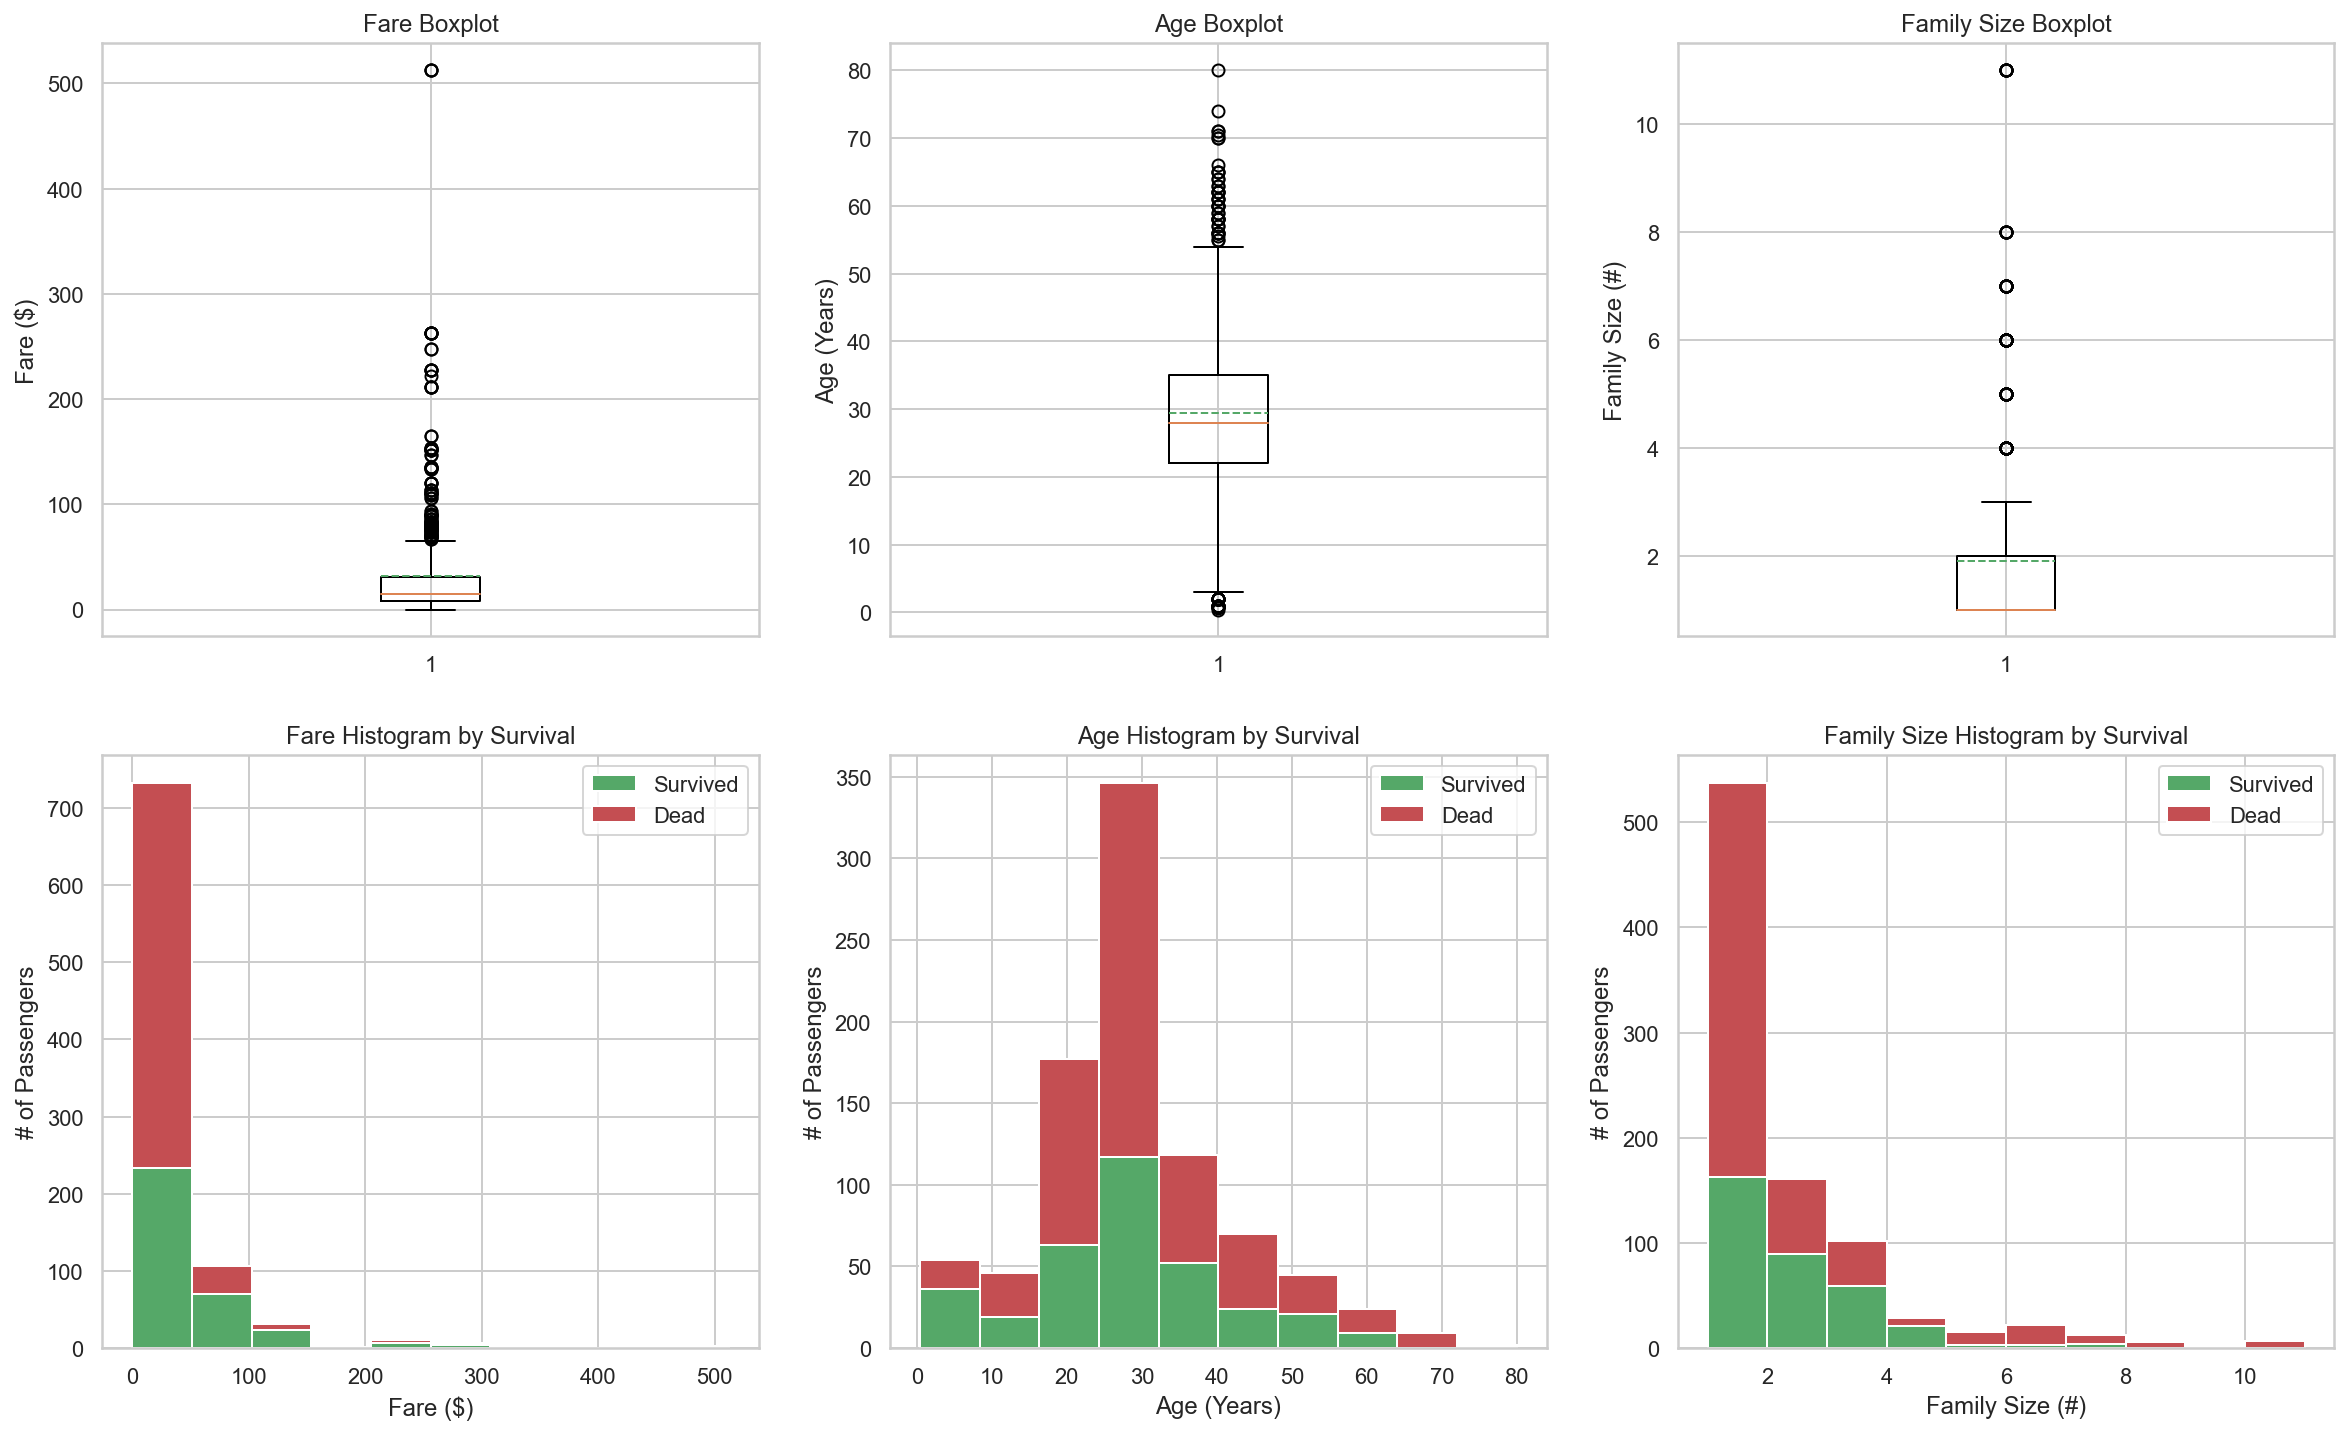

In [40]:
#IMPORTANT: Intentionally plotted different ways for learning purposes only. 

#to organize our graphics will use figure: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html#matplotlib.pyplot.figure
#subplot: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html#matplotlib.pyplot.subplot
#and subplotS: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html?highlight=matplotlib%20pyplot%20subplots#matplotlib.pyplot.subplots

#graph distribution of quantitative data

plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')


#plt.hist accept a list of Series for parameter x, each for one category
#Default value for # of bins in hist function is 10; there are different ways to determine bins
#With Numpy 1.11 or newer, you can alternatively provide a string describing a binning strategy, 
#such as 'auto', 'sturges', 'fd', 'doane', 'scott', 'rice' or 'sqrt', see numpy.histogram.
plt.subplot(234)
plt.hist(x = [data1[data1['Survived']==1]['Fare'], data1[data1['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']], 
         stacked=True, color = ['g','r'],label = ['Survived','Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()


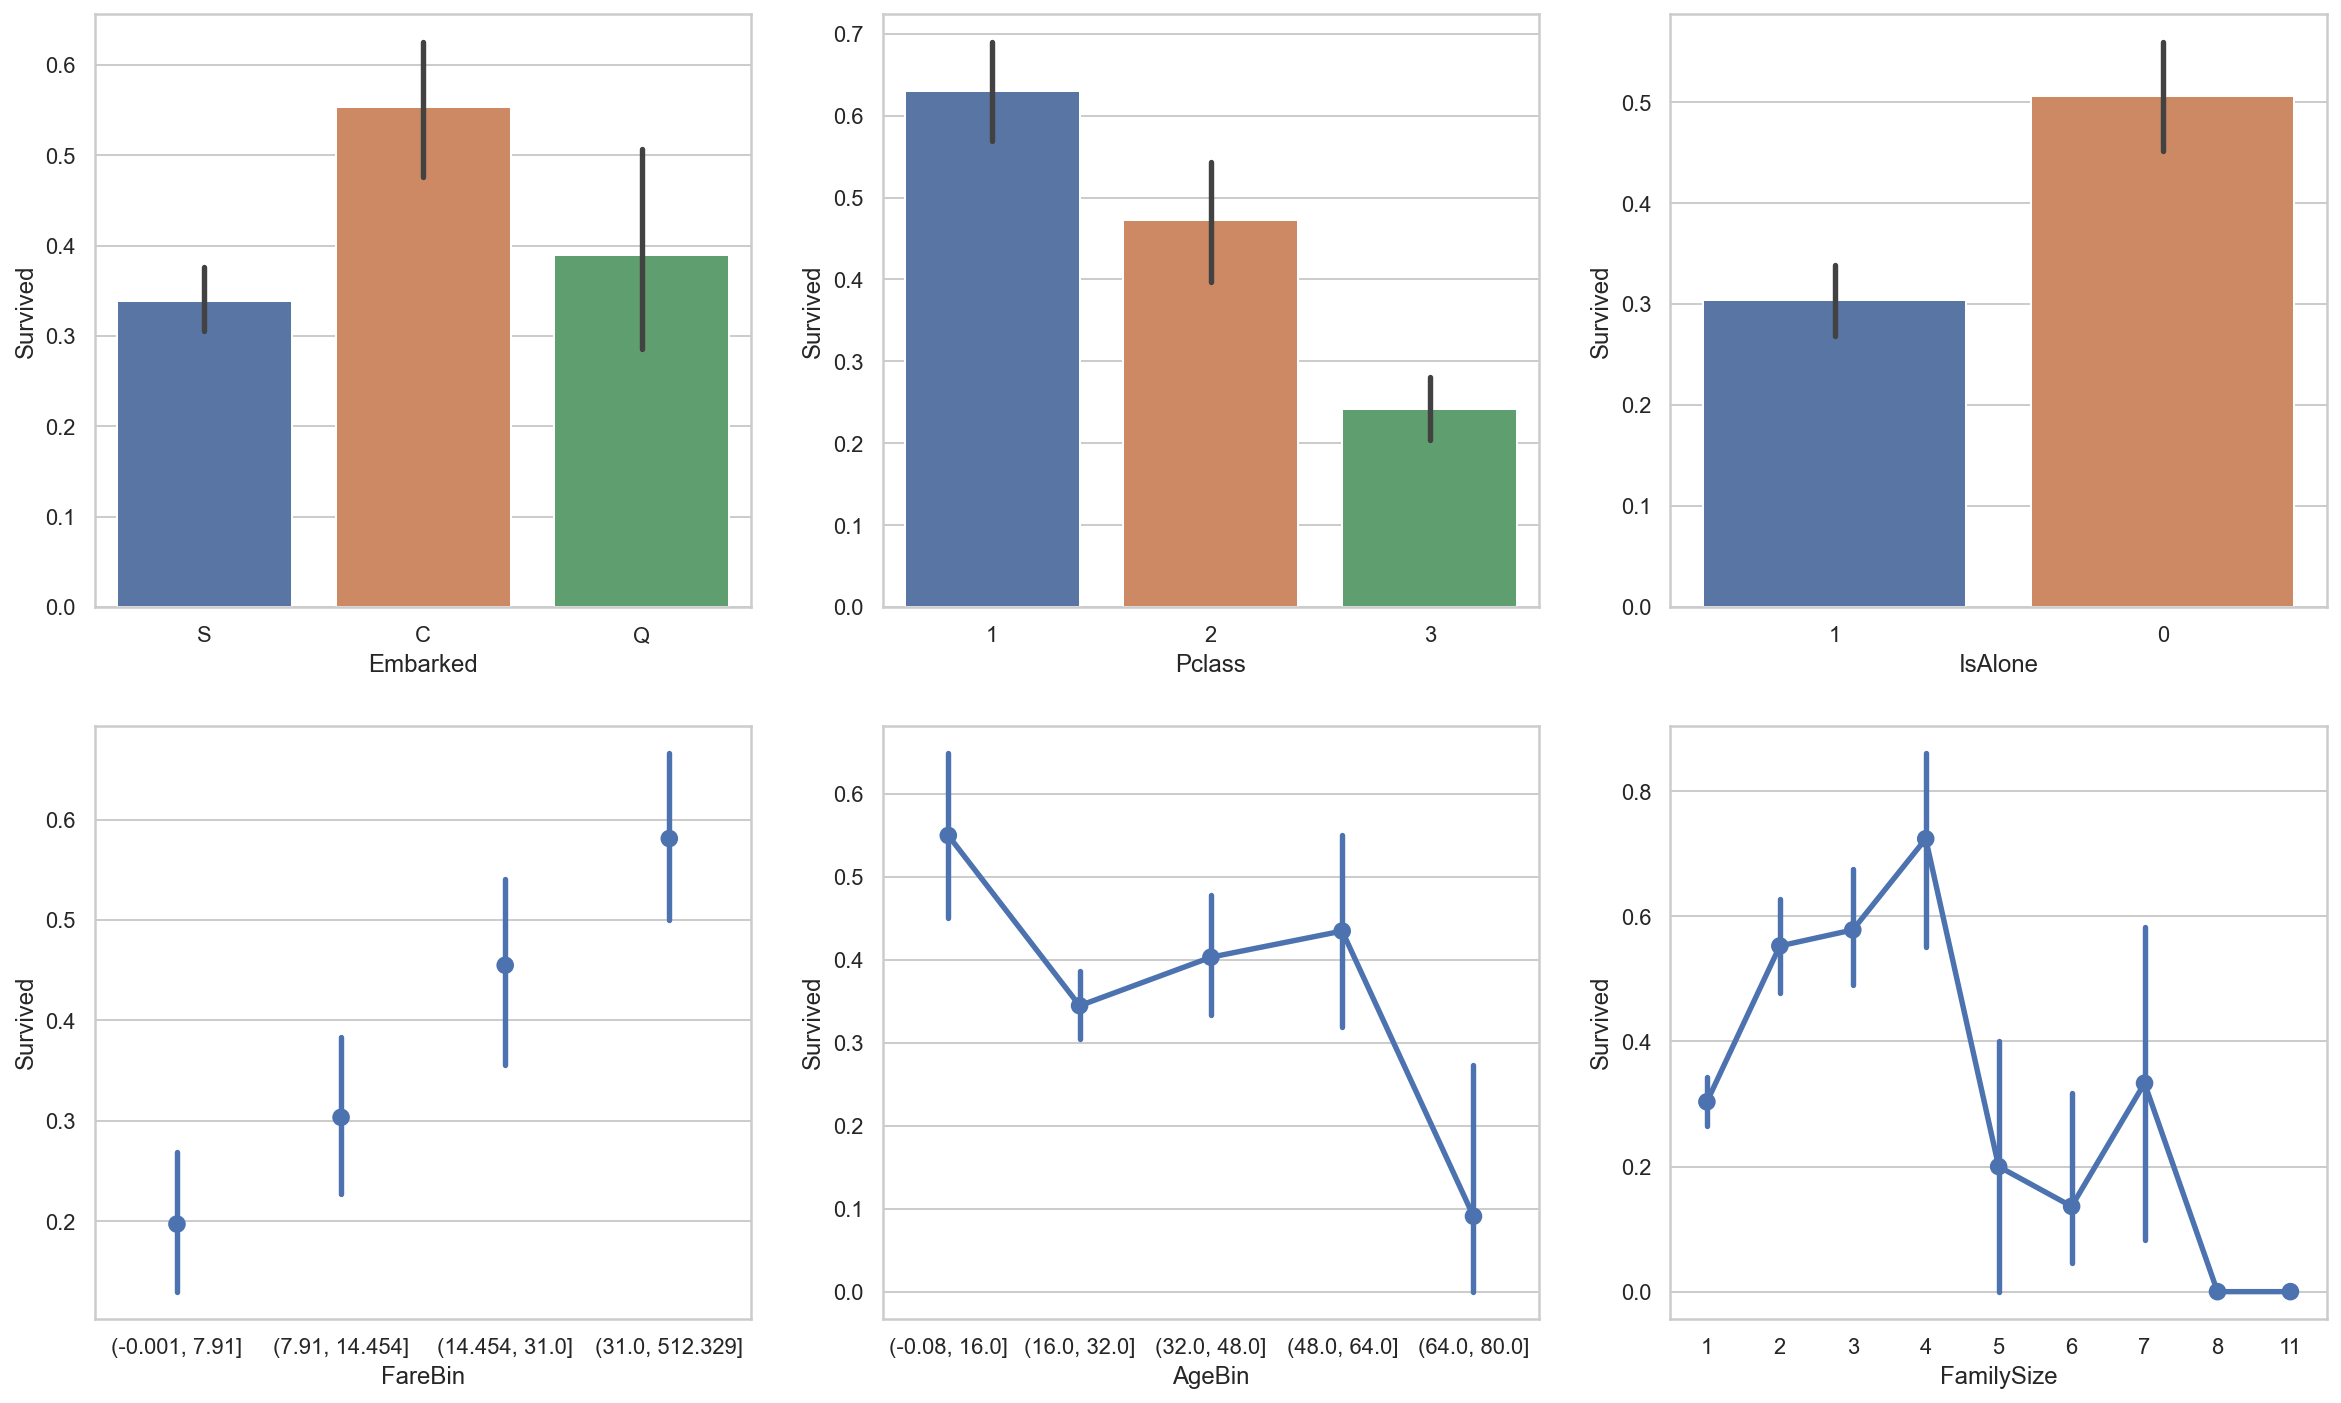

In [41]:
#graph individual features by survival
fig, saxis = plt.subplots(2, 3)

sns.barplot(x = 'Embarked', y = 'Survived', data=data1, ax = saxis[0,0], ci = 95)
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data1, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data1, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived',  data=data1, ax = saxis[1,0], ci=99, join=False)  # you can use ci to set confidence interval
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data1, ax = saxis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=data1, ax = saxis[1,2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

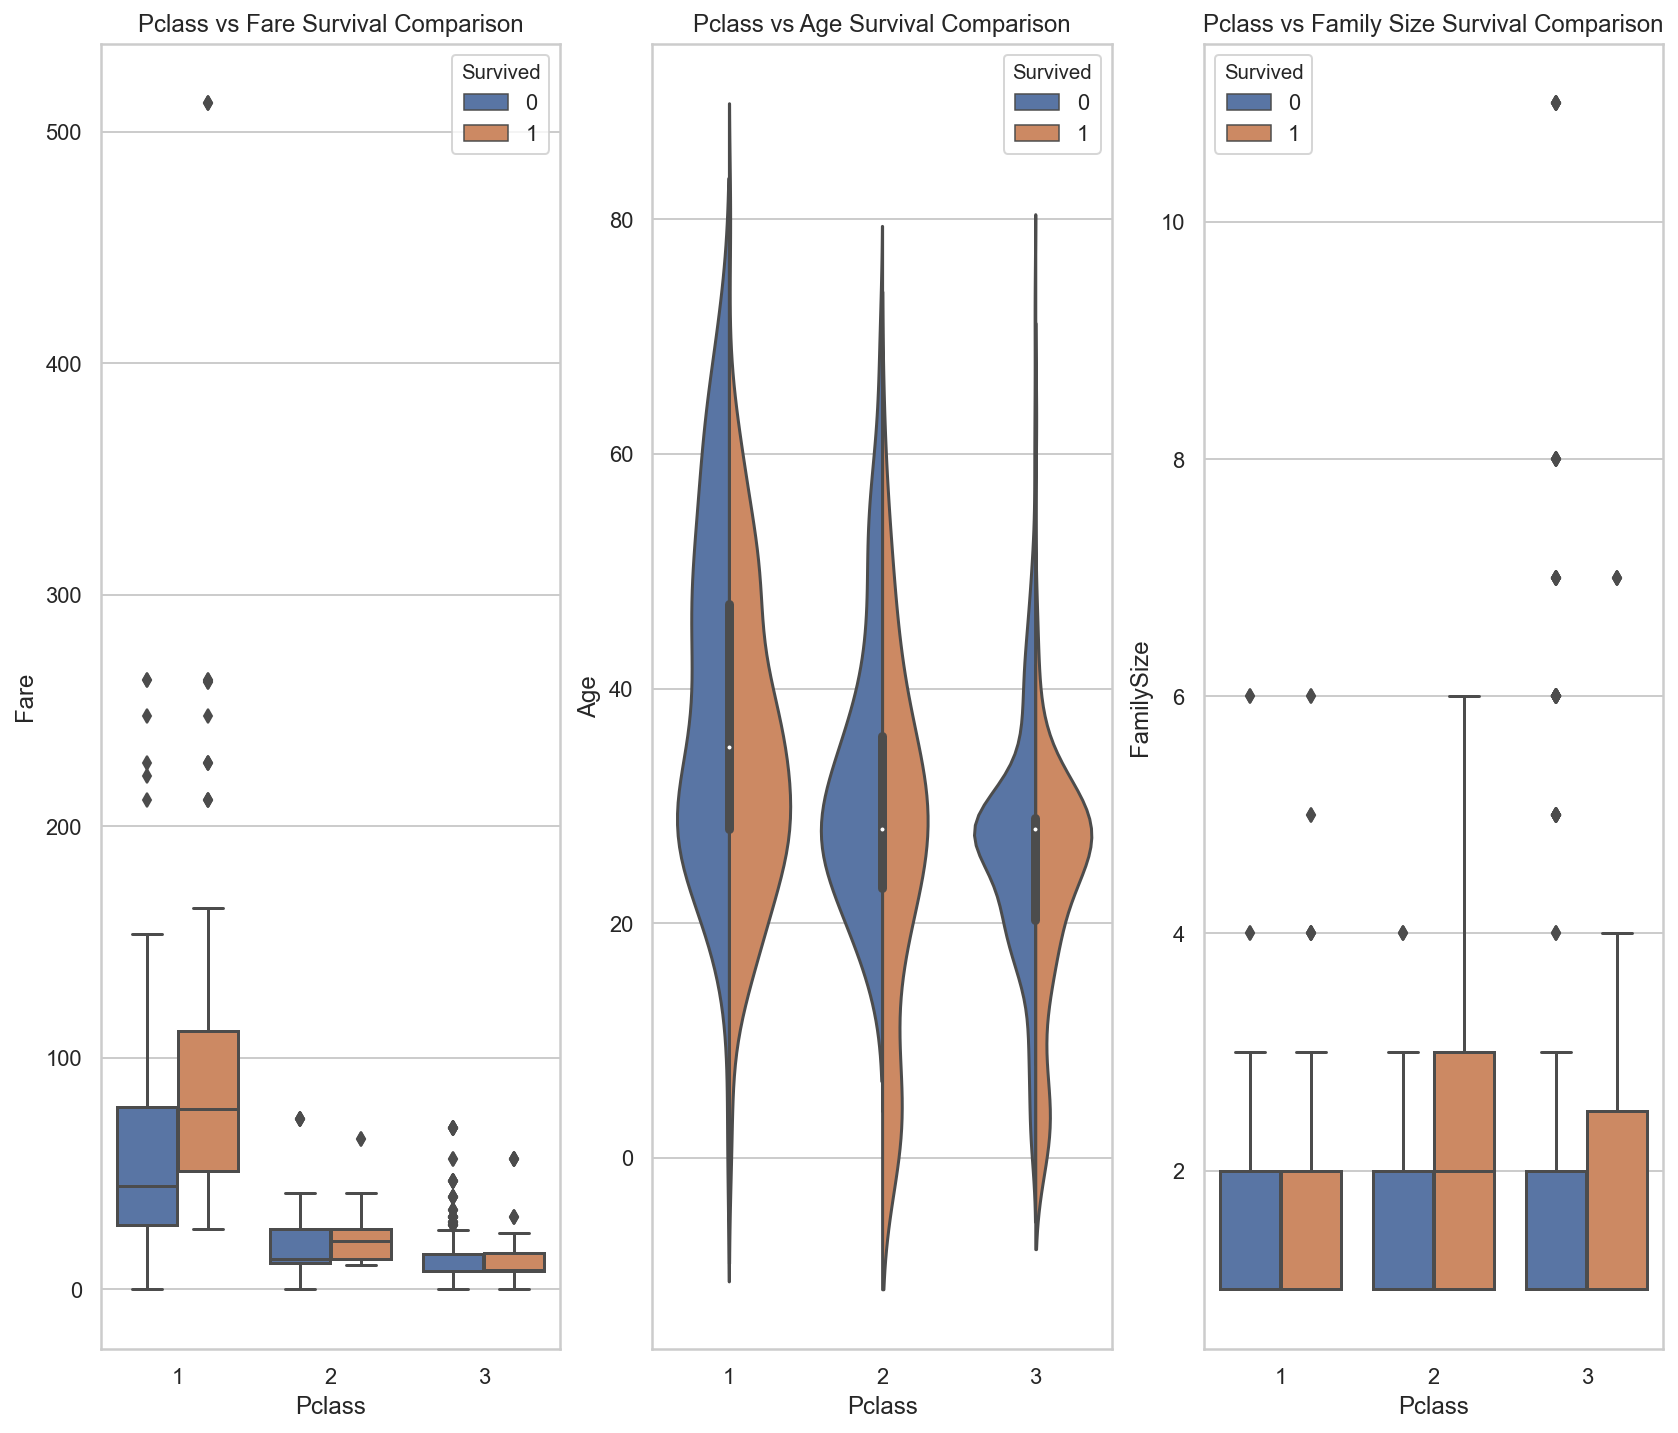

In [42]:
#graph distribution of qualitative data: Pclass
#we know class mattered in survival, now let's compare class and a 2nd feature
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

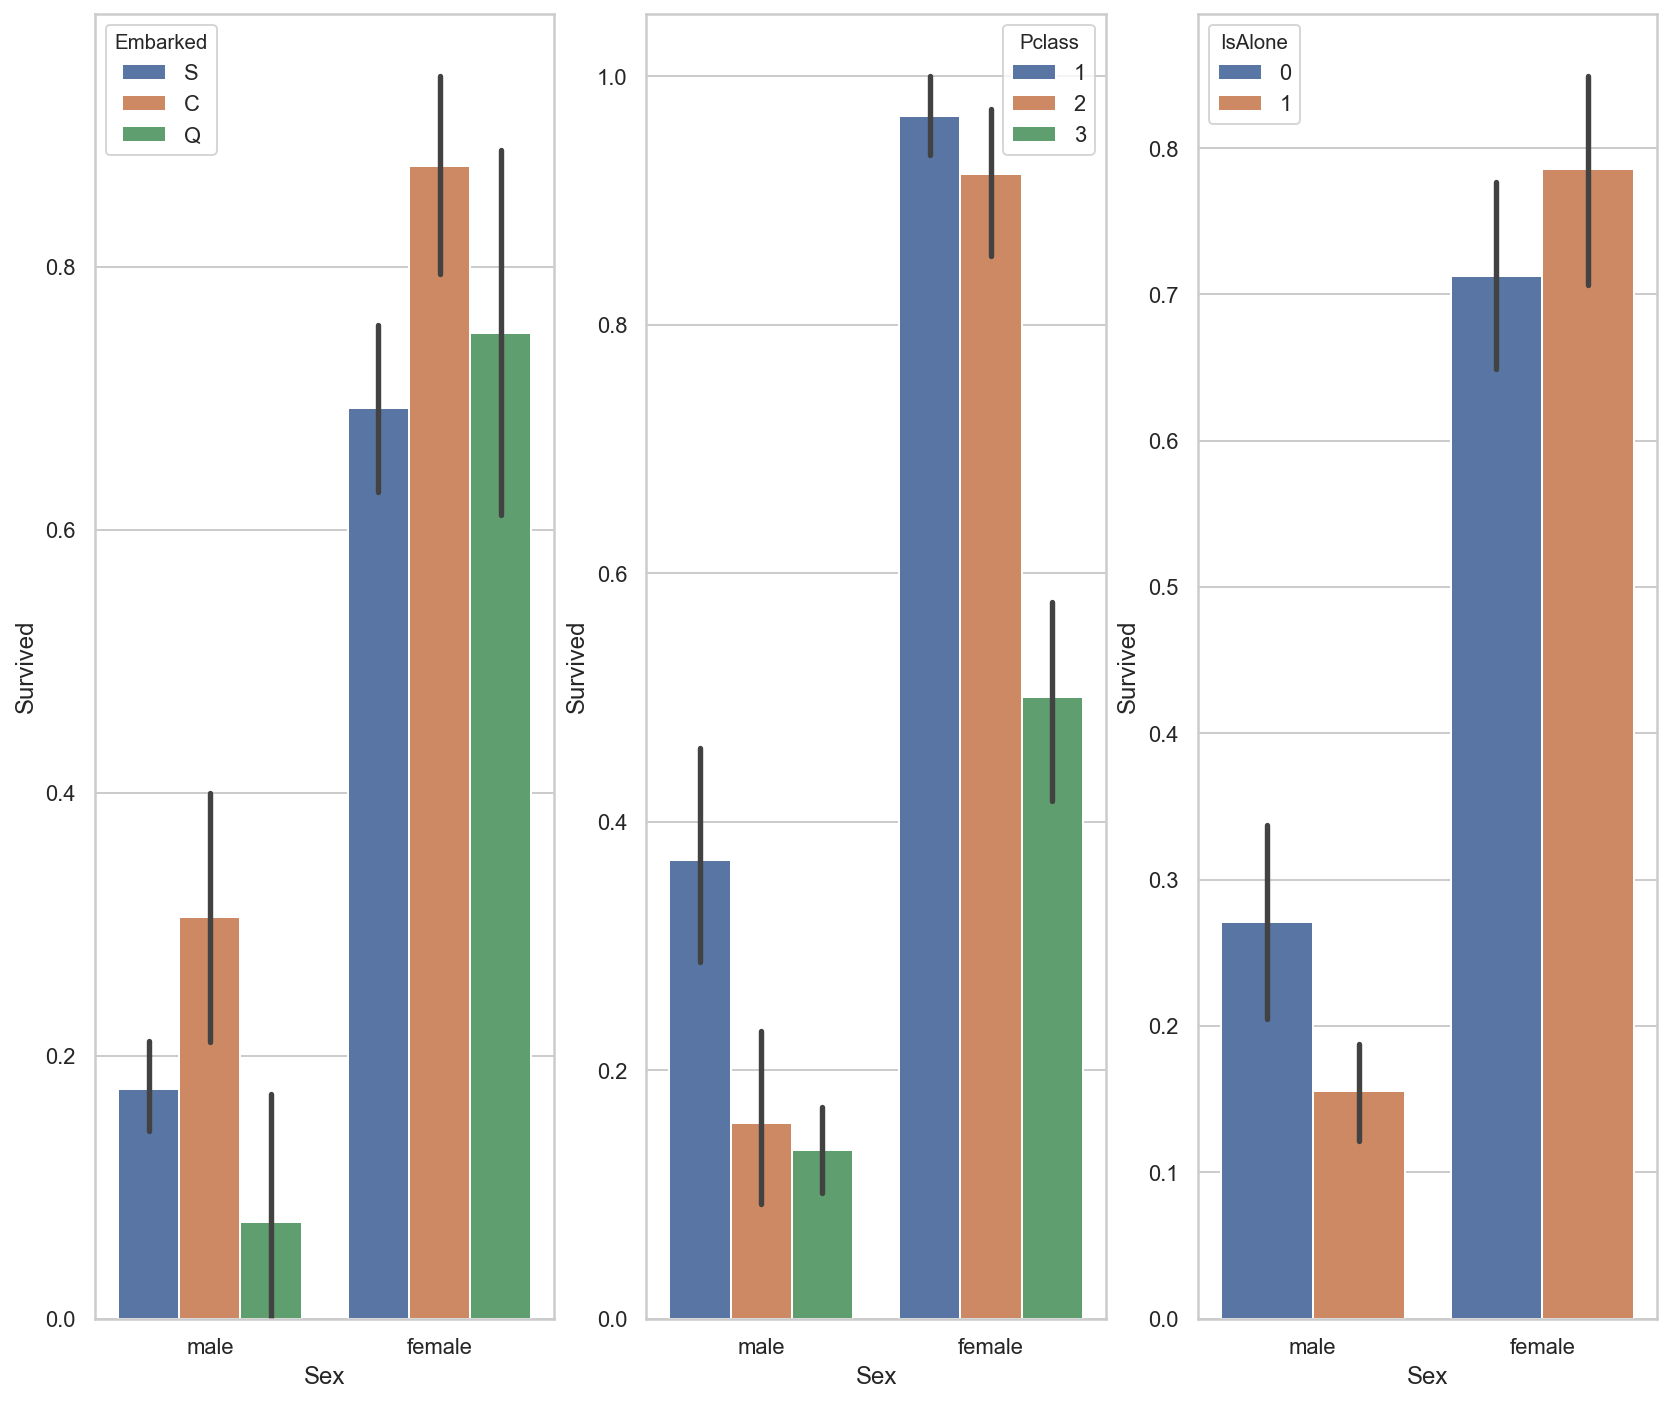

In [43]:
#graph distribution of qualitative data: Sex
#we know sex mattered in survival, now let's compare sex and a 2nd feature
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax = qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax  = qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data1, ax  = qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')

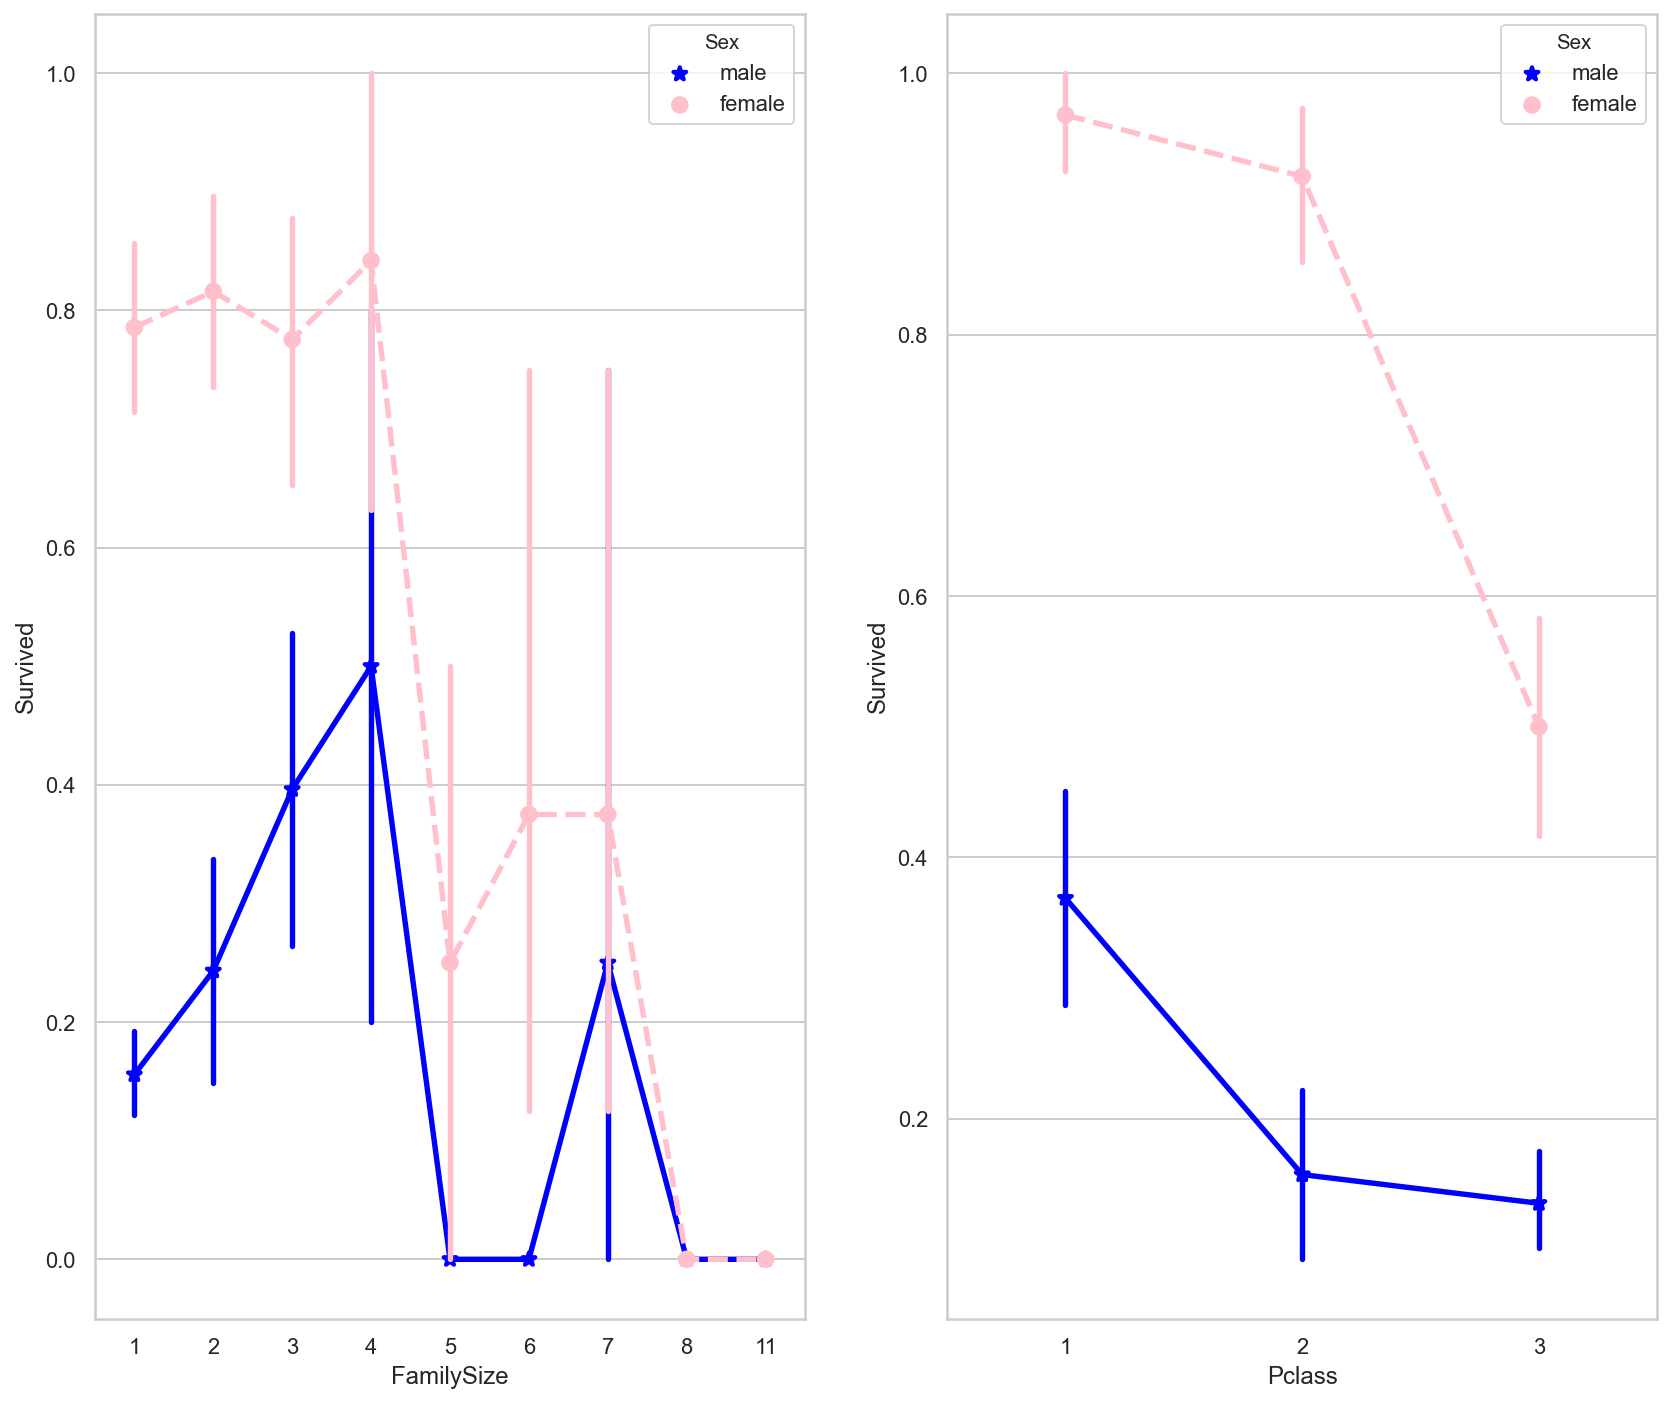

In [44]:
#more side-by-side comparisons
fig, ax = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = ax[0])

#how does class factor with sex & survival compare
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = ax[1])

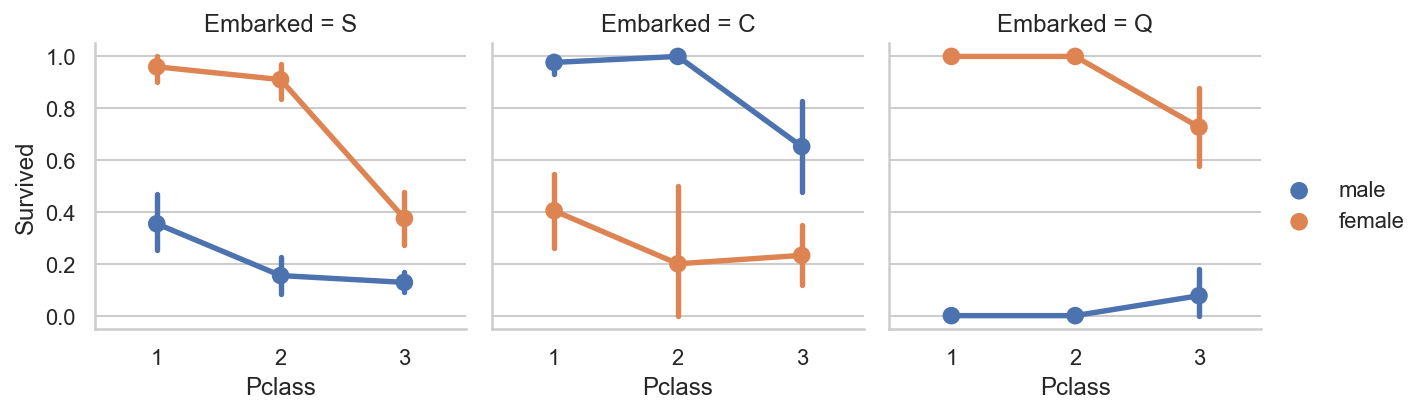

In [45]:
#how does embark port factor with class, sex, and survival compare
#facetgrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
e = sns.FacetGrid(data1, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()

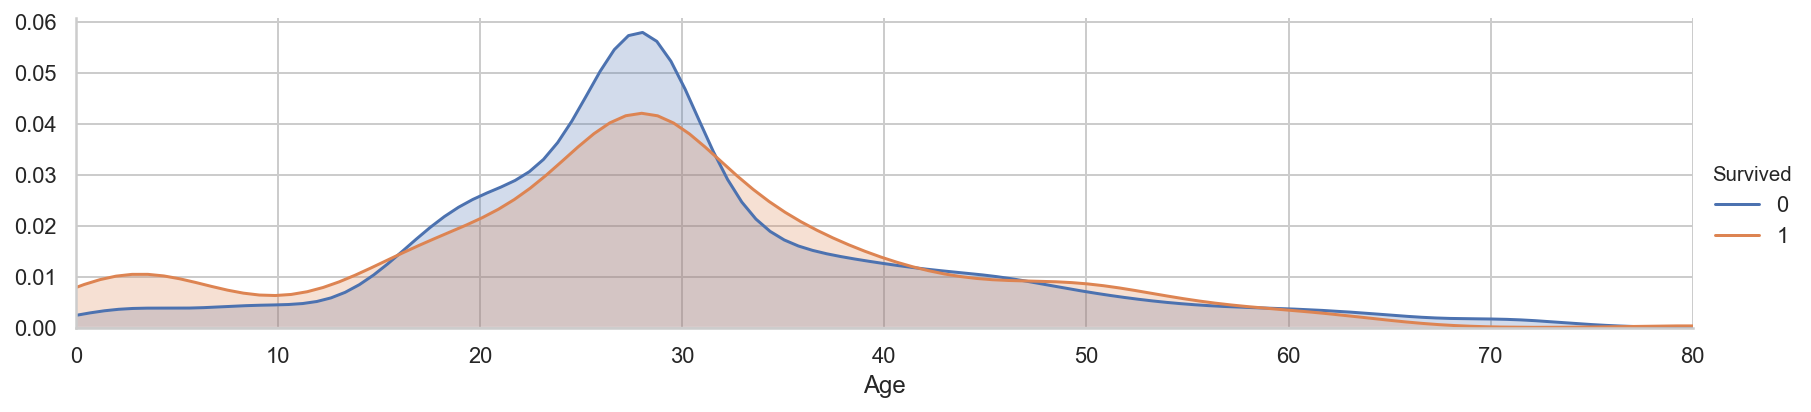

In [46]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( data1, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data1['Age'].max()))
a.add_legend()

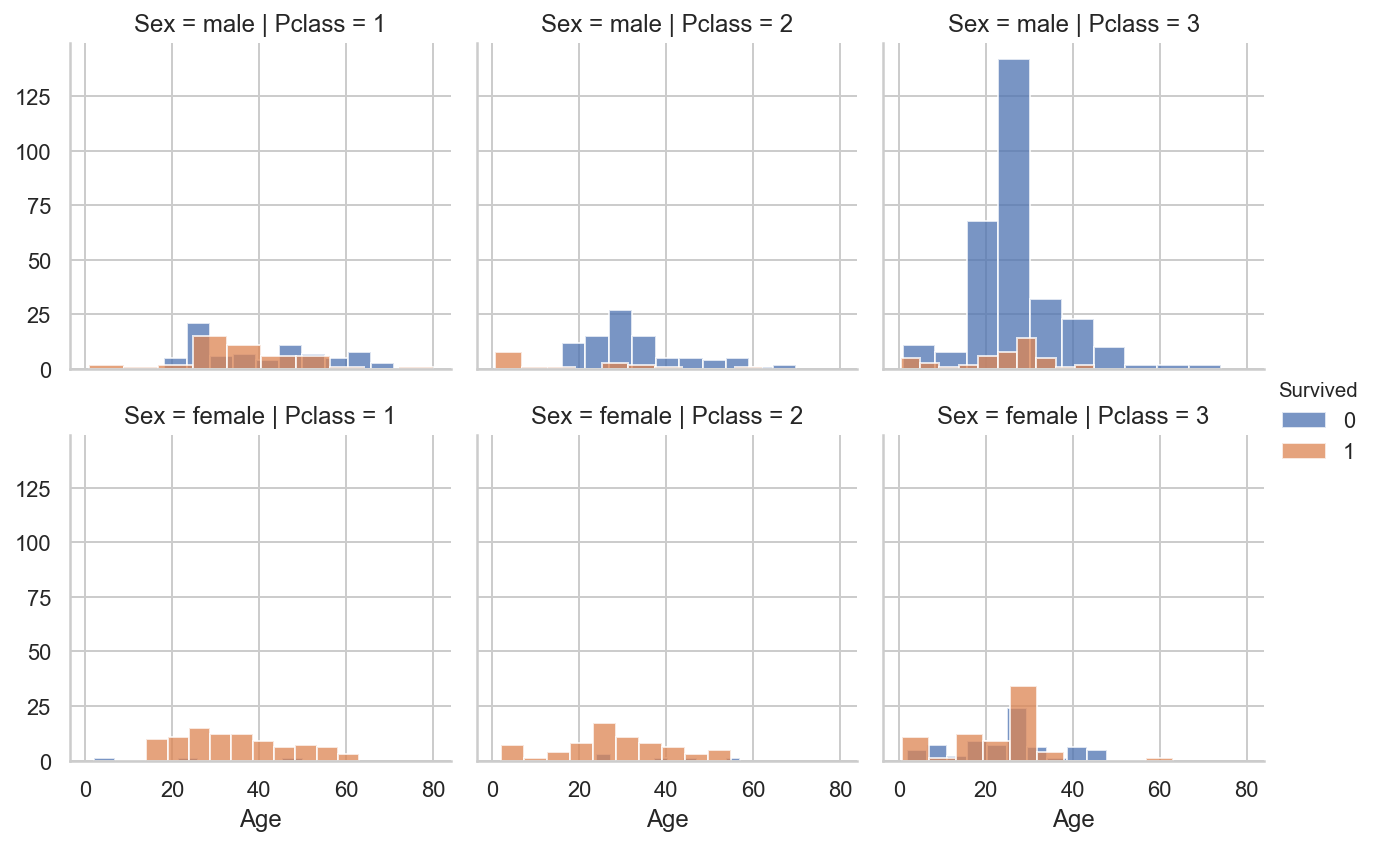

In [47]:
#histogram comparison of sex, class, and age by survival
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

### Pearson's correlation
For two random variable $X$ and $Y$:

${\displaystyle \rho _{X,Y}={\frac {\operatorname {E} [(X-\mu _{X})(Y-\mu _{Y})]}{\sigma _{X}\sigma _{Y}}}}$

For a sample set:
${\displaystyle r_{xy}={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{{\sqrt {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}{\sqrt {\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}}}$

### General Question: 
Correlated features are good for prediction or not? 

Short answer: It depends! Generally in inference problems it is not a good idea to have correlation but in prediction it might help model to emphasize different aspects, however it's a trade-off between speed and accuracy.

Read discussion here (all responses): https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features

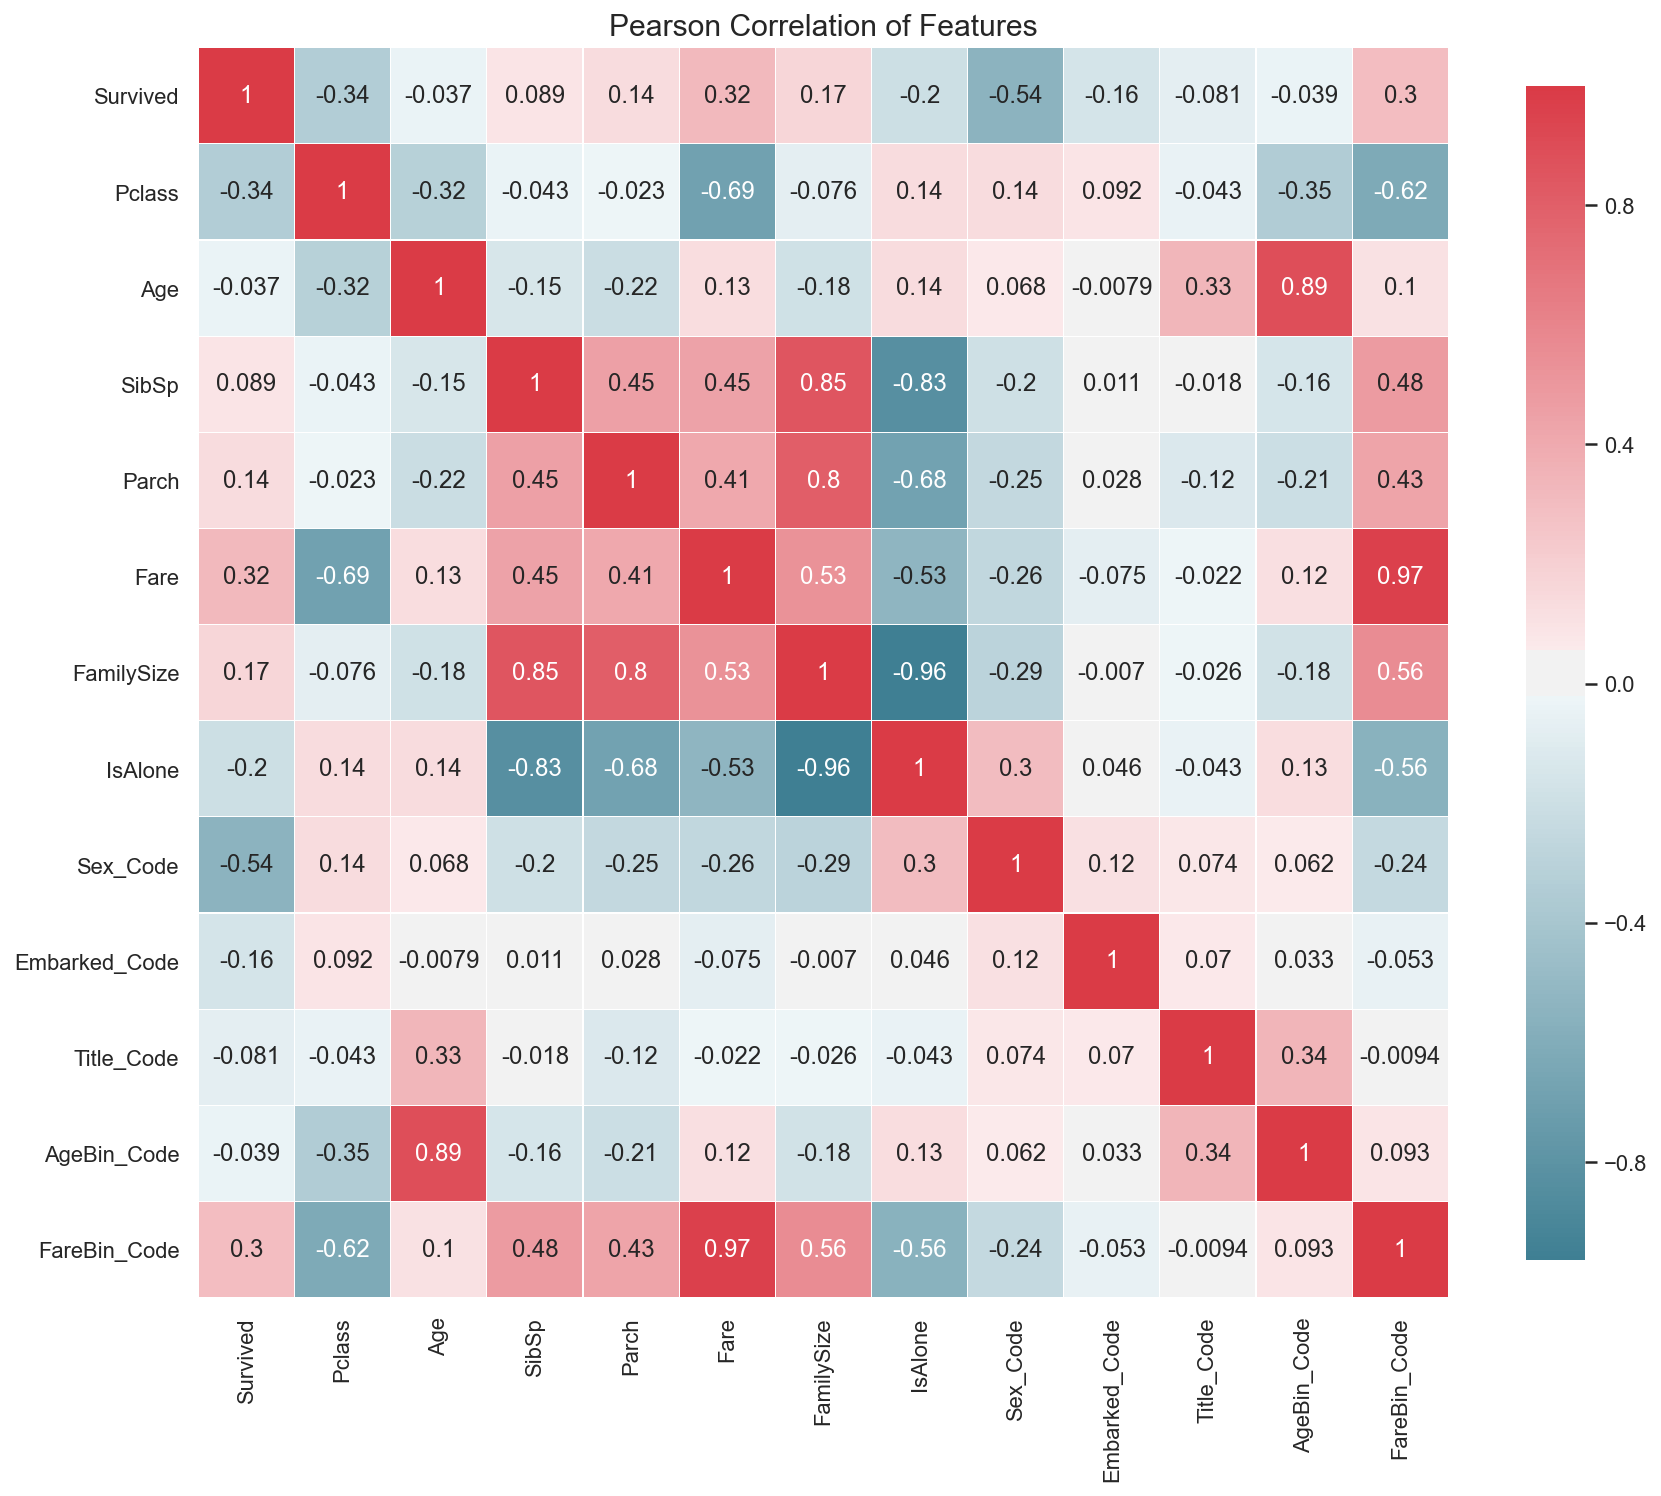

In [48]:
#correlation heatmap of dataset
#https://seaborn.pydata.org/generated/seaborn.diverging_palette.html
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(method='spearman'), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

<a id="ch7"></a>
# Step 5: Model Data
Data Science is a multi-disciplinary field between mathematics (i.e. statistics, linear algebra, etc.), computer science (i.e. programming languages, computer systems, etc.) and business management (i.e. communication, subject-matter knowledge, etc.). Most data scientist come from one of the three fields, so they tend to lean towards that discipline. However, data science is like a three-legged stool, with no one leg being more important than the other. 

We can generalize that a continuous target variable requires a regression algorithm and a discrete target variable requires a classification algorithm. Since our problem is predicting if a passenger survived or did not survive, this is a discrete target variable. We will use a classification algorithm from the *sklearn* library to begin our analysis. We will use cross validation and scoring metrics, discussed in later sections, to rank and compare our algorithms’ performance.

**Machine Learning Selection:**
* [Sklearn Estimator Overview](http://scikit-learn.org/stable/user_guide.html)
* [Sklearn Estimator Detail](http://scikit-learn.org/stable/modules/classes.html)
* [Choosing Estimator Mind Map](http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
* [Choosing Estimator Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)


Now that we identified our solution as a supervised learning classification algorithm. We can narrow our list of choices.

**Machine Learning Classification Algorithms:**
* [Ensemble Methods](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)
* [Generalized Linear Models (GLM)](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)
* [Naive Bayes](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes)
* [Nearest Neighbors](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors)
* [Support Vector Machines (SVM)](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)
* [Decision Trees](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.tree)
* [Discriminant Analysis](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.discriminant_analysis)


### How to Choose a Machine Learning Algorithm (MLA)
When it comes to data modeling, the question is always, "what is the best machine learning algorithm?" To this the beginner must learn, the [No Free Lunch Theorem (NFLT)](http://robertmarks.org/Classes/ENGR5358/Papers/NFL_4_Dummies.pdf) of Machine Learning. In short, NFLT states, there is no super algorithm, that works best in all situations, for all datasets. So the best approach is to try multiple MLAs, tune them, and compare them for your specific scenario. With that being said, some good research has been done to compare algorithms, such as [Caruana & Niculescu-Mizil 2006](https://www.cs.cornell.edu/~caruana/ctp/ct.papers/caruana.icml06.pdf) watch [video lecture here](http://videolectures.net/solomon_caruana_wslmw/) of MLA comparisons, [Ogutu et al. 2011](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3103196/) done by the NIH for genomic selection, [Fernandez-Delgado et al. 2014](http://jmlr.org/papers/volume15/delgado14a/delgado14a.pdf) comparing 179 classifiers from 17 families, [Thoma 2016 sklearn comparison](https://martin-thoma.com/comparing-classifiers/), and there is also a school of thought that says, [more data beats a better algorithm](https://www.kdnuggets.com/2015/06/machine-learning-more-data-better-algorithms.html). 

So with all this information, where is a beginner to start? I recommend starting with [Trees, Bagging, Random Forests, and Boosting](http://jessica2.msri.org/attachments/10778/10778-boost.pdf). They are basically different implementations of a decision tree, which is the easiest concept to learn and understand. They are also easier to tune, discussed in the next section, than something like SVC. Below, I'll give an overview of how-to run and compare several MLAs.


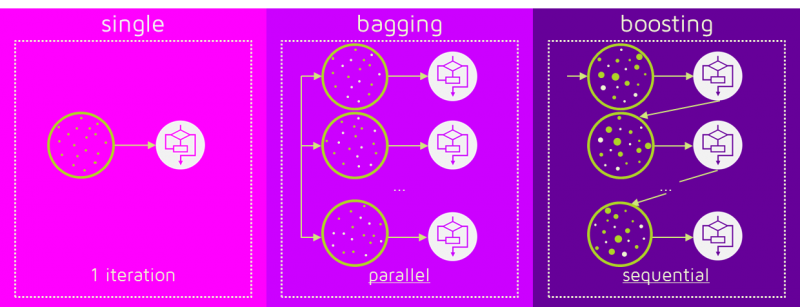

In [49]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(), #Sequential fits, using weighted version of data from previous step
    ensemble.BaggingClassifier(), #Averaging Trees 
    ensemble.RandomForestClassifier(), #Random Forest, random sampling + at each split pick random features m=sqrt(p)
    ensemble.ExtraTreesClassifier(),  #Extremely Randomized Trees, same as Random forest, but the split threshold is also random
    ensemble.GradientBoostingClassifier(), #Generalization of boosting to arbitrary differentiable loss functions (Default loss function is the probablistic output of Logistic Regression)

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(), #Gaussian process is nothing but a stochastic process (i.e. collection of random variables) s.t. every linear combination of variables is a (Multivariate) Normal Distribution. In case of classification (since it is discrete) some approximations are used
    
    #GLM, read https://scikit-learn.org/stable/modules/linear_model.html
    linear_model.LogisticRegressionCV(), #Logistic Regression Cross-Validation
    linear_model.PassiveAggressiveClassifier(), #Passive: if correct classification, keep the model; Aggressive: if incorrect classification, update to adjust to this misclassified example
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(), #by default gives linear SVM, trained by Stochastic Gradient Descent
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(), #Good for discrete data
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True), #has a limiting Number on the number of support vectors, default kernel 'RBF'
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(), #Fits gaussian function using Bayes' rule
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost, watch: https://www.youtube.com/watch?v=Vly8xGnNiWs
    XGBClassifier() #It is an implementation of Gradient boosting tree
    ]




In [50]:

#split dataset in cross-validation with this splitter class
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = data1[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    print(MLA_name)
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict



AdaBoostClassifier
BaggingClassifier
RandomForestClassifier
ExtraTreesClassifier
GradientBoostingClassifier
GaussianProcessClassifier
LogisticRegressionCV
PassiveAggressiveClassifier
RidgeClassifierCV
SGDClassifier
Perceptron
BernoulliNB
GaussianNB
KNeighborsClassifier
SVC
NuSVC
LinearSVC
DecisionTreeClassifier
ExtraTreeClassifier
LinearDiscriminantAnalysis
QuadraticDiscriminantAnalysis
XGBClassifier


,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
21,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.856367,0.829478,0.0527546,0.0427899
14,SVC,"{'C': 1.0, 'cache_size': 200, 'class_weight': ...",0.837266,0.826119,0.0453876,0.0437009
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.889888,0.824254,0.0597493,0.015899
4,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.866667,0.822761,0.0498731,0.0783552
15,NuSVC,"{'cache_size': 200, 'class_weight': None, 'coe...",0.835768,0.822761,0.0493681,0.0487014
17,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.822015,0.0532276,0.00409722
2,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.892135,0.821642,0.0538711,0.0146955
3,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.895131,0.816418,0.066376,0.0142125
13,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.850375,0.813806,0.0690863,0.00449429
18,ExtraTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.895131,0.813433,0.0682744,0.00379319


Text(0, 0.5, 'Algorithm')

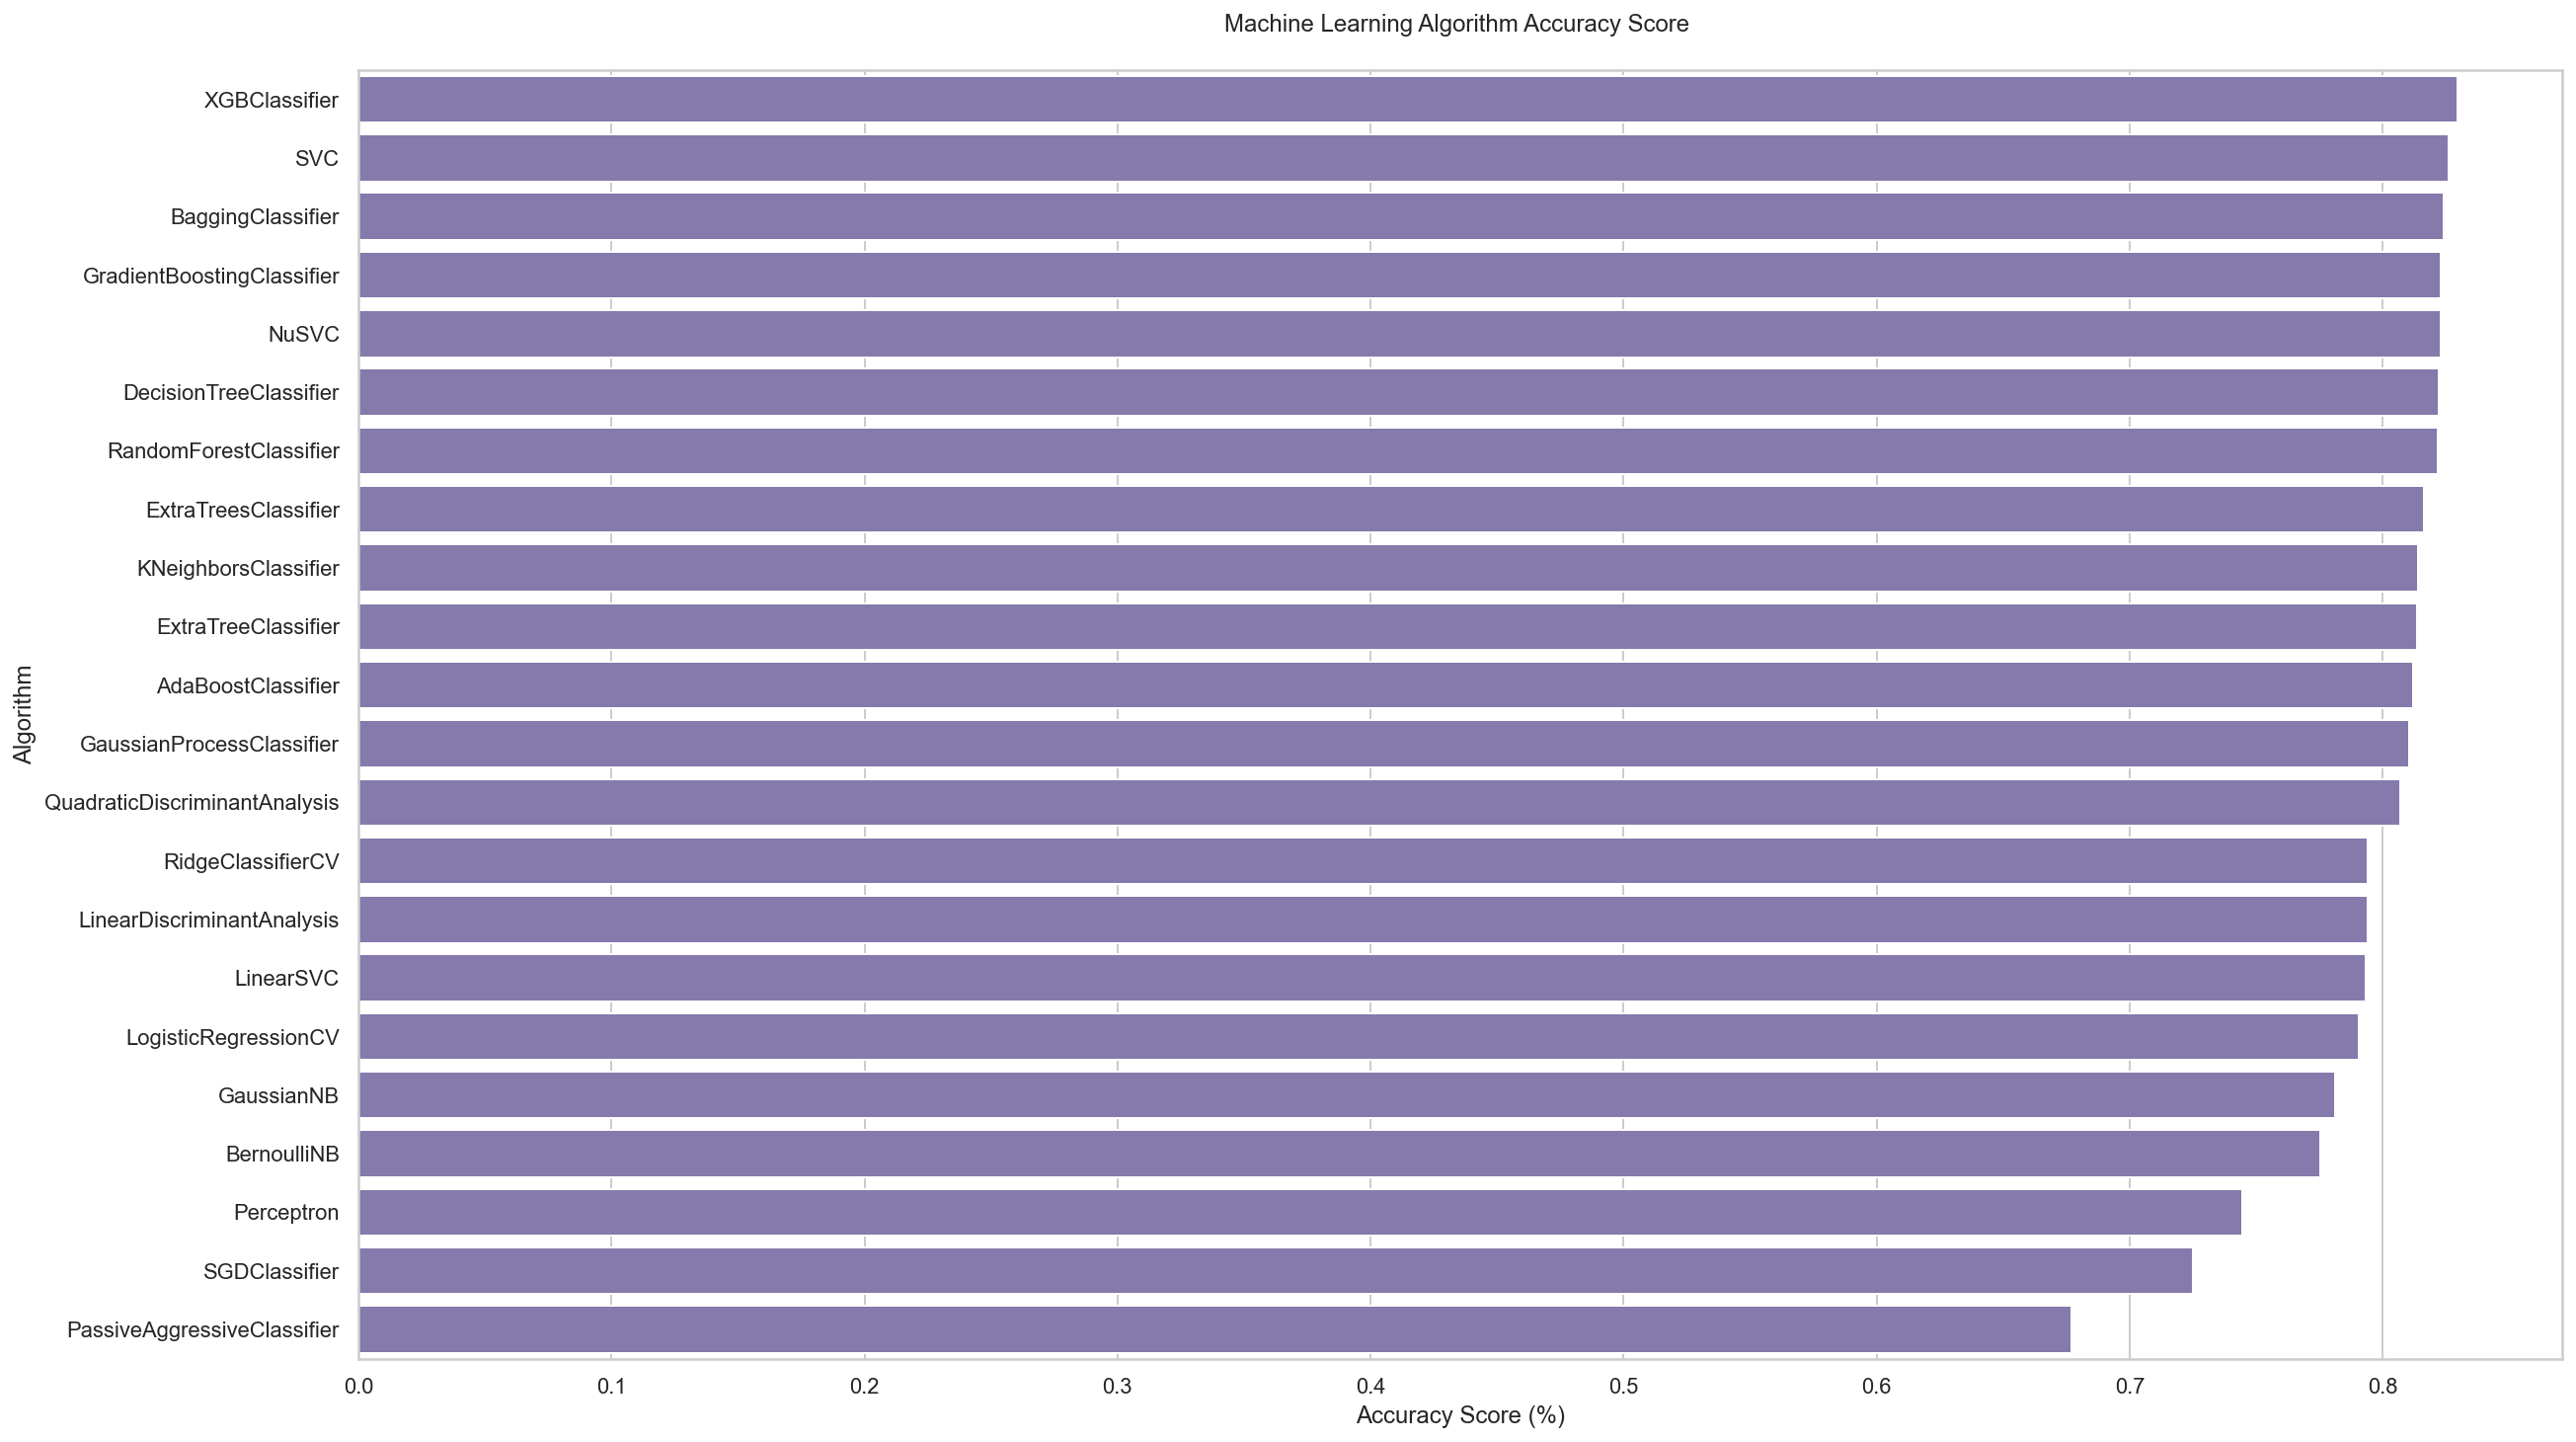

In [51]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

<a id="ch8"></a>
## 5.1 Evaluate Model Performance
Let's recap, with some basic data cleaning, analysis, and machine learning algorithms (MLA), we are able to predict passenger survival with ~82% accuracy. Not bad for a few lines of code. But the question we always ask is, can we do better and more importantly get an ROI (return on investment) for our time invested? For example, if we're only going to increase our accuracy by 1/10th of a percent, is it really worth 3-months of development. If you work in research maybe the answer is yes, but if you work in business mostly the answer is no. So, keep that in mind when improving your model.

### Data Science 101: Determine a Baseline Accuracy ###
Before we decide how-to make our model better, let's determine if our model is even worth keeping. To do that, we have to go back to the basics of data science 101. We know this is a binary problem, because there are only two possible outcomes; passengers survived or died. So, think of it like a coin flip problem. If you have a fair coin and you guessed heads or tail, then you have a 50-50 chance of guessing correct. So, let's set 50% as the worst model performance; because anything lower than that, then why do I need you when I can just flip a coin?

Okay, so with no information about the dataset, we can always get 50% with a binary problem. But we have information about the dataset, so we should be able to do better. We know that 1,502/2,224 or 67.5% of people died. Therefore, if we just predict the most frequent occurrence, that 100% of people died, then we would be right 67.5% of the time. So, let's set 68% as bad model performance, because again, anything lower than that, then why do I need you, when I can just predict using the most frequent occurrence.

### Data Science 101: How-to Create Your Own Model ###
Our accuracy is increasing, but can we do better? Are there any signals in our data? To illustrate this, we're going to build our own decision tree model, because it is the easiest to conceptualize and requires simple addition and multiplication calculations. When creating a decision tree, you want to ask questions that segment your target response, placing the survived/1 and dead/0 into homogeneous subgroups. This is part science and part art, so let's just play the 21-question game to show you how it works. If you want to follow along on your own, download the train dataset and import into Excel. Create a pivot table with survival in the columns, count and % of row count in the values, and the features described below in the rows.

Remember, the name of the game is to create subgroups using a decision tree model to get survived/1 in one bucket and dead/0 in another bucket. Our rule of thumb will be the majority rules. Meaning, if the majority or 50% or more survived, then everybody in our subgroup survived/1, but if 50% or less survived then if everybody in our subgroup died/0. Also, we will stop if the subgroup is less than 10 and/or our model accuracy plateaus or decreases. Got it? Let's go!

***Question 1: Were you on the Titanic?*** If Yes, then majority (62%) died. Note our sample survival is different than our population of 68%. Nonetheless, if we assumed everybody died, our sample accuracy is 62%.

***Question 2: Are you male or female?*** Male, majority (81%) died. Female, majority (74%) survived. Giving us an accuracy of 79%.

***Question 3A (going down the female branch with count = 314): Are you in class 1, 2, or 3?*** Class 1, majority (97%) survived and Class 2, majority (92%) survived. Since the dead subgroup is less than 10, we will stop going down this branch. Class 3, is even at a 50-50 split. No new information to improve our model is gained.

***Question 4A (going down the female class 3 branch with count = 144): Did you embark from port C, Q, or S?*** We gain a little information. C and Q, the majority still survived, so no change. Also, the dead subgroup is less than 10, so we will stop. S, the majority (63%) died. So, we will change females, class 3, embarked S from assuming they survived, to assuming they died. Our model accuracy increases to 81%. 

***Question 5A (going down the female class 3 embarked S branch with count = 88):*** So far, it looks like we made good decisions. Adding another level does not seem to gain much more information. This subgroup 55 died and 33 survived, since majority died we need to find a signal to identify the 33 or a subgroup to change them from dead to survived and improve our model accuracy. We can play with our features. One I found was fare 0-8, majority survived. It's a small sample size 11-9, but one often used in statistics. We slightly improve our accuracy, but not much to move us past 82%. So, we'll stop here.

***Question 3B (going down the male branch with count = 577):*** Going back to question 2, we know the majority of males died. So, we are looking for a feature that identifies a subgroup that majority survived. Surprisingly, class or even embarked didn't matter like it did for females, but title does and gets us to 82%. Guess and checking other features, none seem to push us past 82%. So, we'll stop here for now.

You did it, with very little information, we get to 82% accuracy. On a worst, bad, good, better, and best scale, we'll set 82% to good, since it's a simple model that yields us decent results. But the question still remains, can we do better than our handmade model? 

Before we do, let's code what we just wrote above. Please note, this is a manual process created by "hand." You won't have to do this, but it's important to understand it before you start working with MLA. Think of MLA like a calculator on a Calculus Exam. It's very powerful and helps you with a lot of the grunt work. But if you don't know what you're doing on the exam, a calculator, even a TI-89, is not going to help you pass. So, study the next section wisely.

Reference: [Cross-Validation and Decision Tree Tutorial](http://www.cs.utoronto.ca/~fidler/teaching/2015/slides/CSC411/tutorial3_CrossVal-DTs.pdf)

In [52]:
#IMPORTANT: This is a handmade model for learning purposes only.

#coin flip model with random 1/survived 0/died

#iterate over dataFrame rows as (index, Series) pairs
for index, row in data1.iterrows(): 
    if random.random() > .5:     # Random float x, 0.0 <= x < 1.0    
        data1.set_value(index, 'Random_Predict', 1) #predict survived/1
    else: 
        data1.set_value(index, 'Random_Predict', 0) #predict died/0
    

#score random guess of survival. Use shortcut 1 = Right Guess and 0 = Wrong Guess
#the mean of the column will then equal the accuracy
data1['Random_Score'] = 0 #assume prediction wrong
data1.loc[(data1['Survived'] == data1['Random_Predict']), 'Random_Score'] = 1 #set to 1 for correct prediction
print('Coin Flip Model Accuracy: {:.2f}%'.format(data1['Random_Score'].mean()*100))

#we can also use scikit's accuracy_score function to save us a few lines of code
#http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
print('Coin Flip Model Accuracy w/SciKit: {:.2f}%'.format(metrics.accuracy_score(data1['Survived'], data1['Random_Predict'])*100))


Coin Flip Model Accuracy: 54.32%
Coin Flip Model Accuracy w/SciKit: 54.32%


In [53]:
#group by or pivot table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
pivot_female = data1[data1.Sex=='female'].groupby(['Sex','Pclass', 'Embarked','FareBin'])['Survived'].mean()
print('Survival Decision Tree w/Female Node: \n',pivot_female)

pivot_male = data1[data1.Sex=='male'].groupby(['Sex','Title'])['Survived'].mean()
print('\n\nSurvival Decision Tree w/Male Node: \n',pivot_male)

Survival Decision Tree w/Female Node: 
 Sex     Pclass  Embarked  FareBin        
female  1       C         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]     0.666667
                          (31.0, 512.329]    1.000000
                Q         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]          NaN
                          (31.0, 512.329]    1.000000
                S         (-0.001, 7.91]          NaN
                          (7.91, 14.454]          NaN
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    0.955556
        2       C         (-0.001, 7.91]          NaN
                          (7.91, 14.454]     1.000000
                          (14.454, 31.0]     1.000000
                          (31.0, 512.329]    1.000000
                Q         (-0.001, 7.91]          NaN


In [54]:
#handmade data model using brain power (and Microsoft Excel Pivot Tables for quick calculations)
def mytree(df):
    
    #initialize table to store predictions
    Model = pd.DataFrame(data = {'Predict':[]})
    male_title = ['Master'] #survived titles

    for index, row in df.iterrows():

        #Question 1: Were you on the Titanic; majority died
        Model.loc[index, 'Predict'] = 0

        #Question 2: Are you female; majority survived
        if (df.loc[index, 'Sex'] == 'female'):
                  Model.loc[index, 'Predict'] = 1

        #Question 3A Female - Class and Question 4 Embarked gain minimum information

        #Question 5B Female - FareBin; set anything less than .5 in female node decision tree back to 0       
        if ((df.loc[index, 'Sex'] == 'female') & 
            (df.loc[index, 'Pclass'] == 3) & 
            (df.loc[index, 'Embarked'] == 'S')  &
            (df.loc[index, 'Fare'] > 8)

           ):
                  Model.loc[index, 'Predict'] = 0

        #Question 3B Male: Title; set anything greater than .5 to 1 for majority survived
        if ((df.loc[index, 'Sex'] == 'male') &
            (df.loc[index, 'Title'] in male_title)
            ):
            Model.loc[index, 'Predict'] = 1
        
        
    return Model


#model data
Tree_Predict = mytree(data1)
print('Decision Tree Model Accuracy/Precision Score: {:.2f}%\n'.format(metrics.accuracy_score(data1['Survived'], Tree_Predict)*100))


#Accuracy Summary Report with http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report
#Where recall score = (true positives)/(true positive + false negative) w/1 being best:http://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
#And F1 score = weighted average of precision and recall w/1 being best: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
print(metrics.classification_report(data1['Survived'], Tree_Predict))



Decision Tree Model Accuracy/Precision Score: 82.04%

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       549
           1       0.82      0.68      0.75       342

    accuracy                           0.82       891
   macro avg       0.82      0.79      0.80       891
weighted avg       0.82      0.82      0.82       891



Confusion matrix, without normalization
[[497  52]
 [108 234]]
Normalized confusion matrix
[[0.91 0.09]
 [0.32 0.68]]


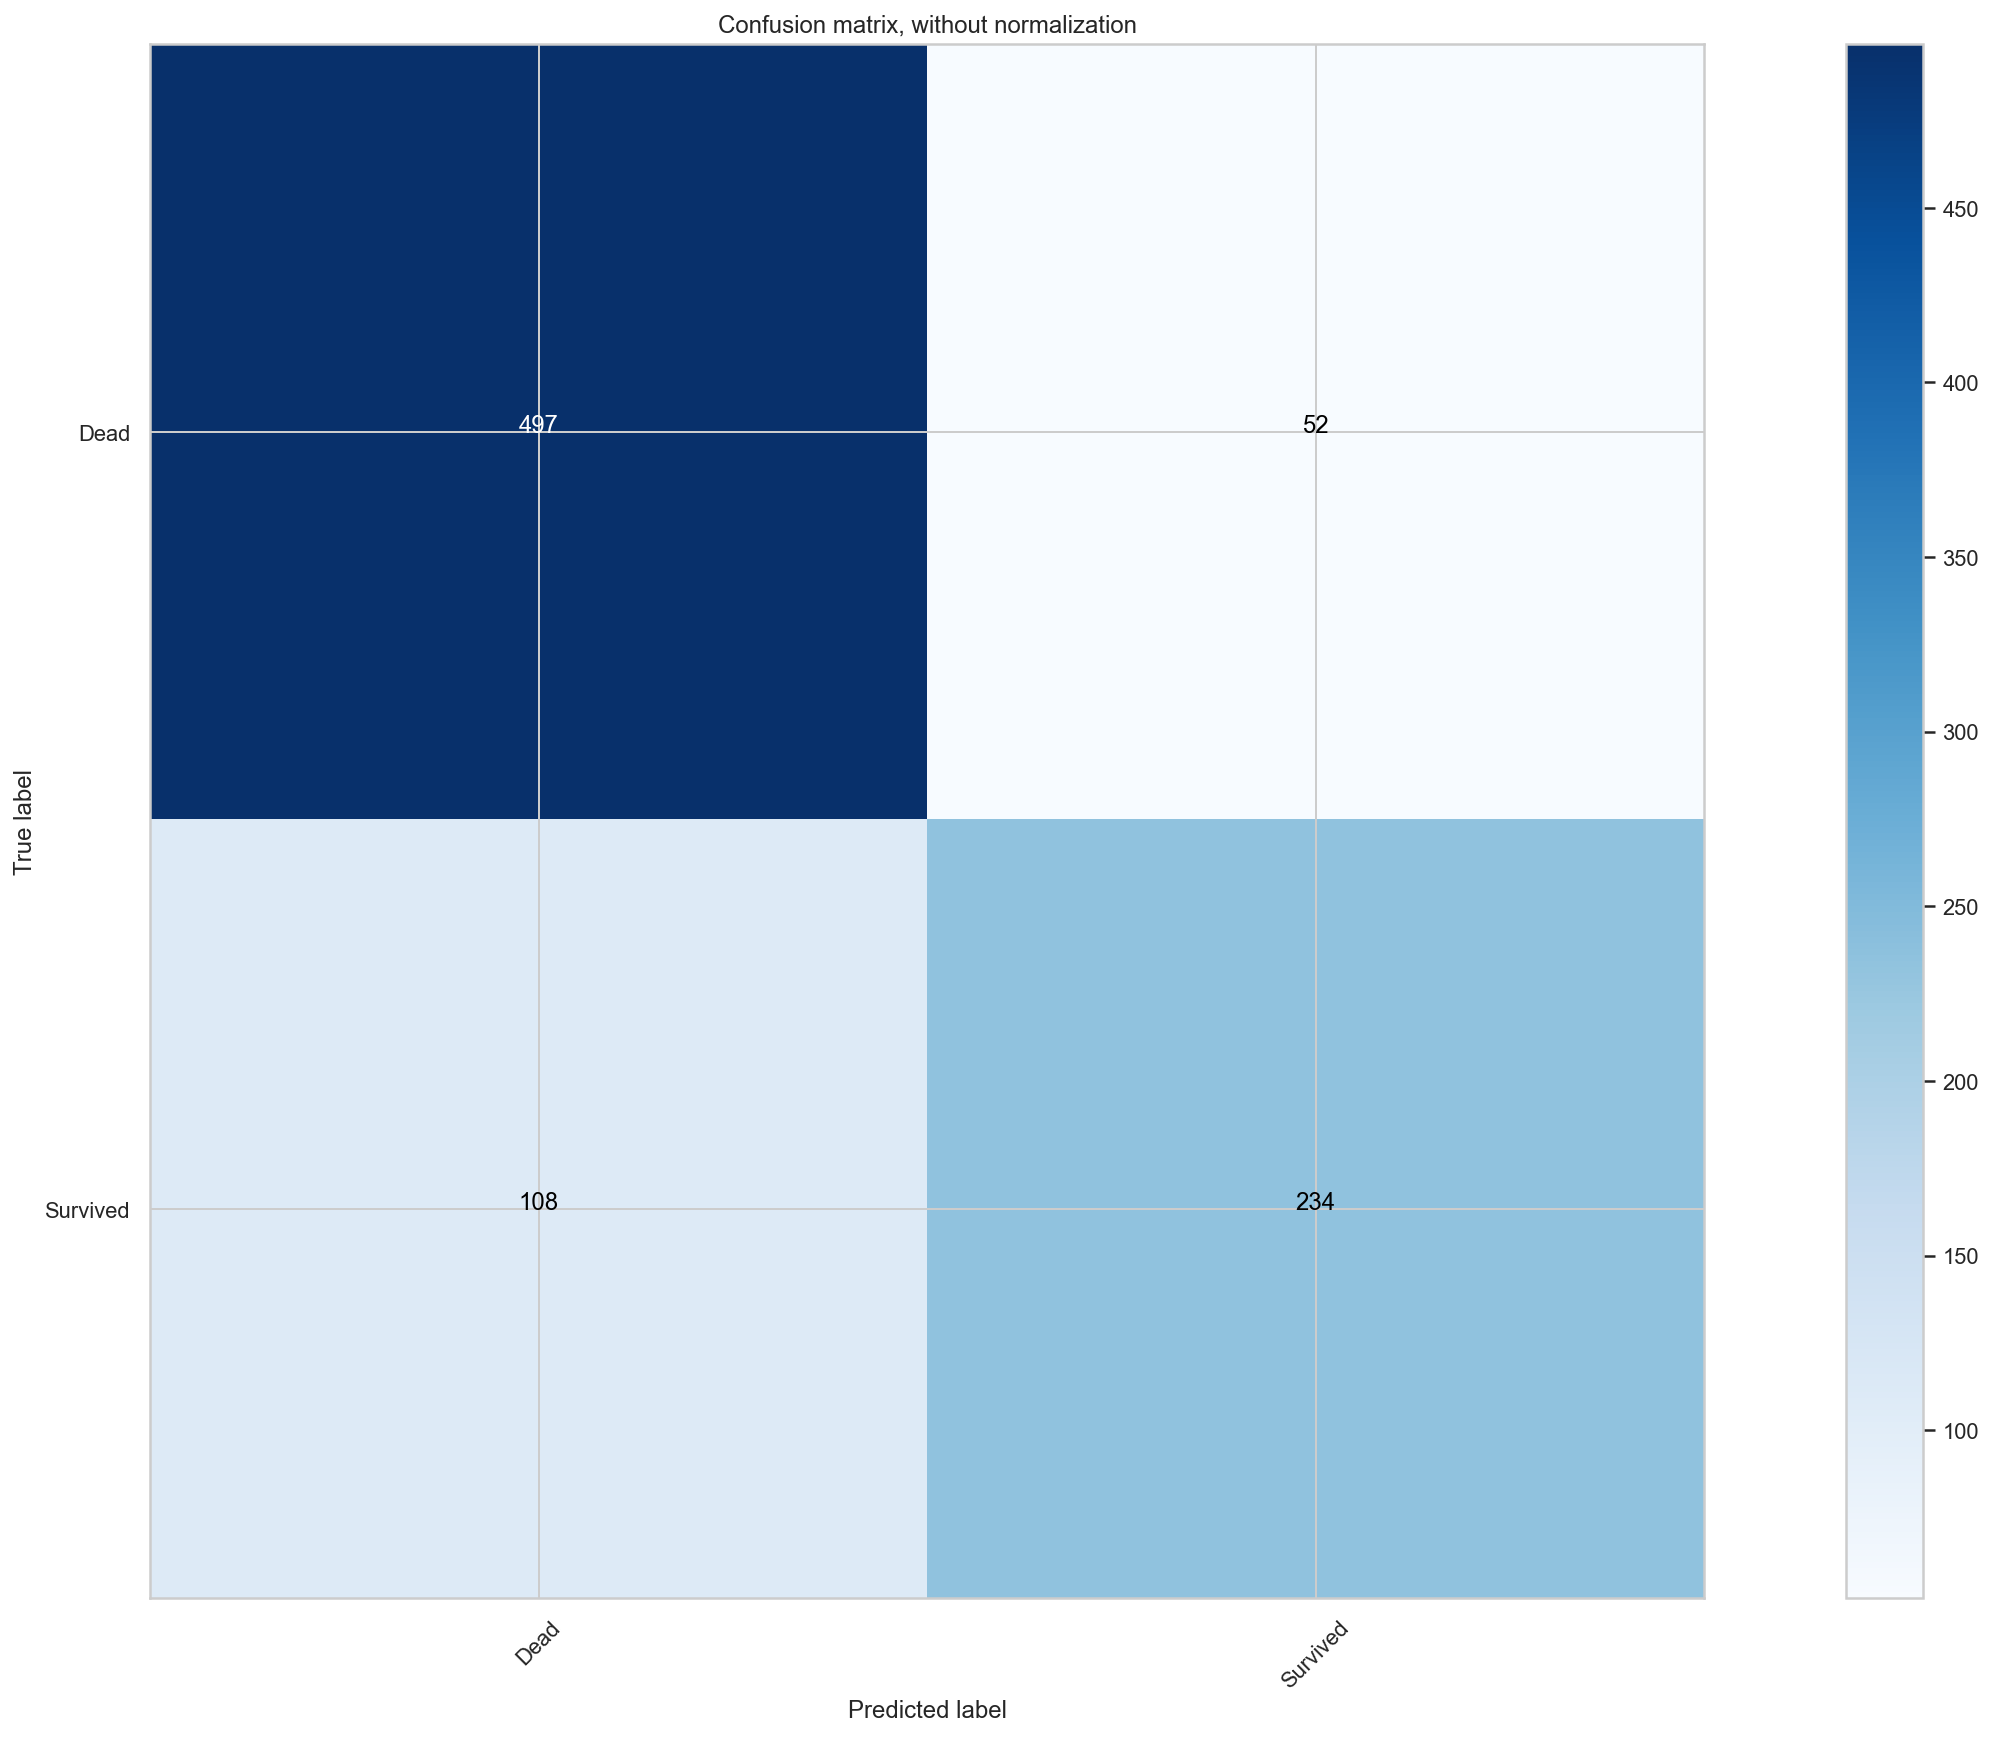

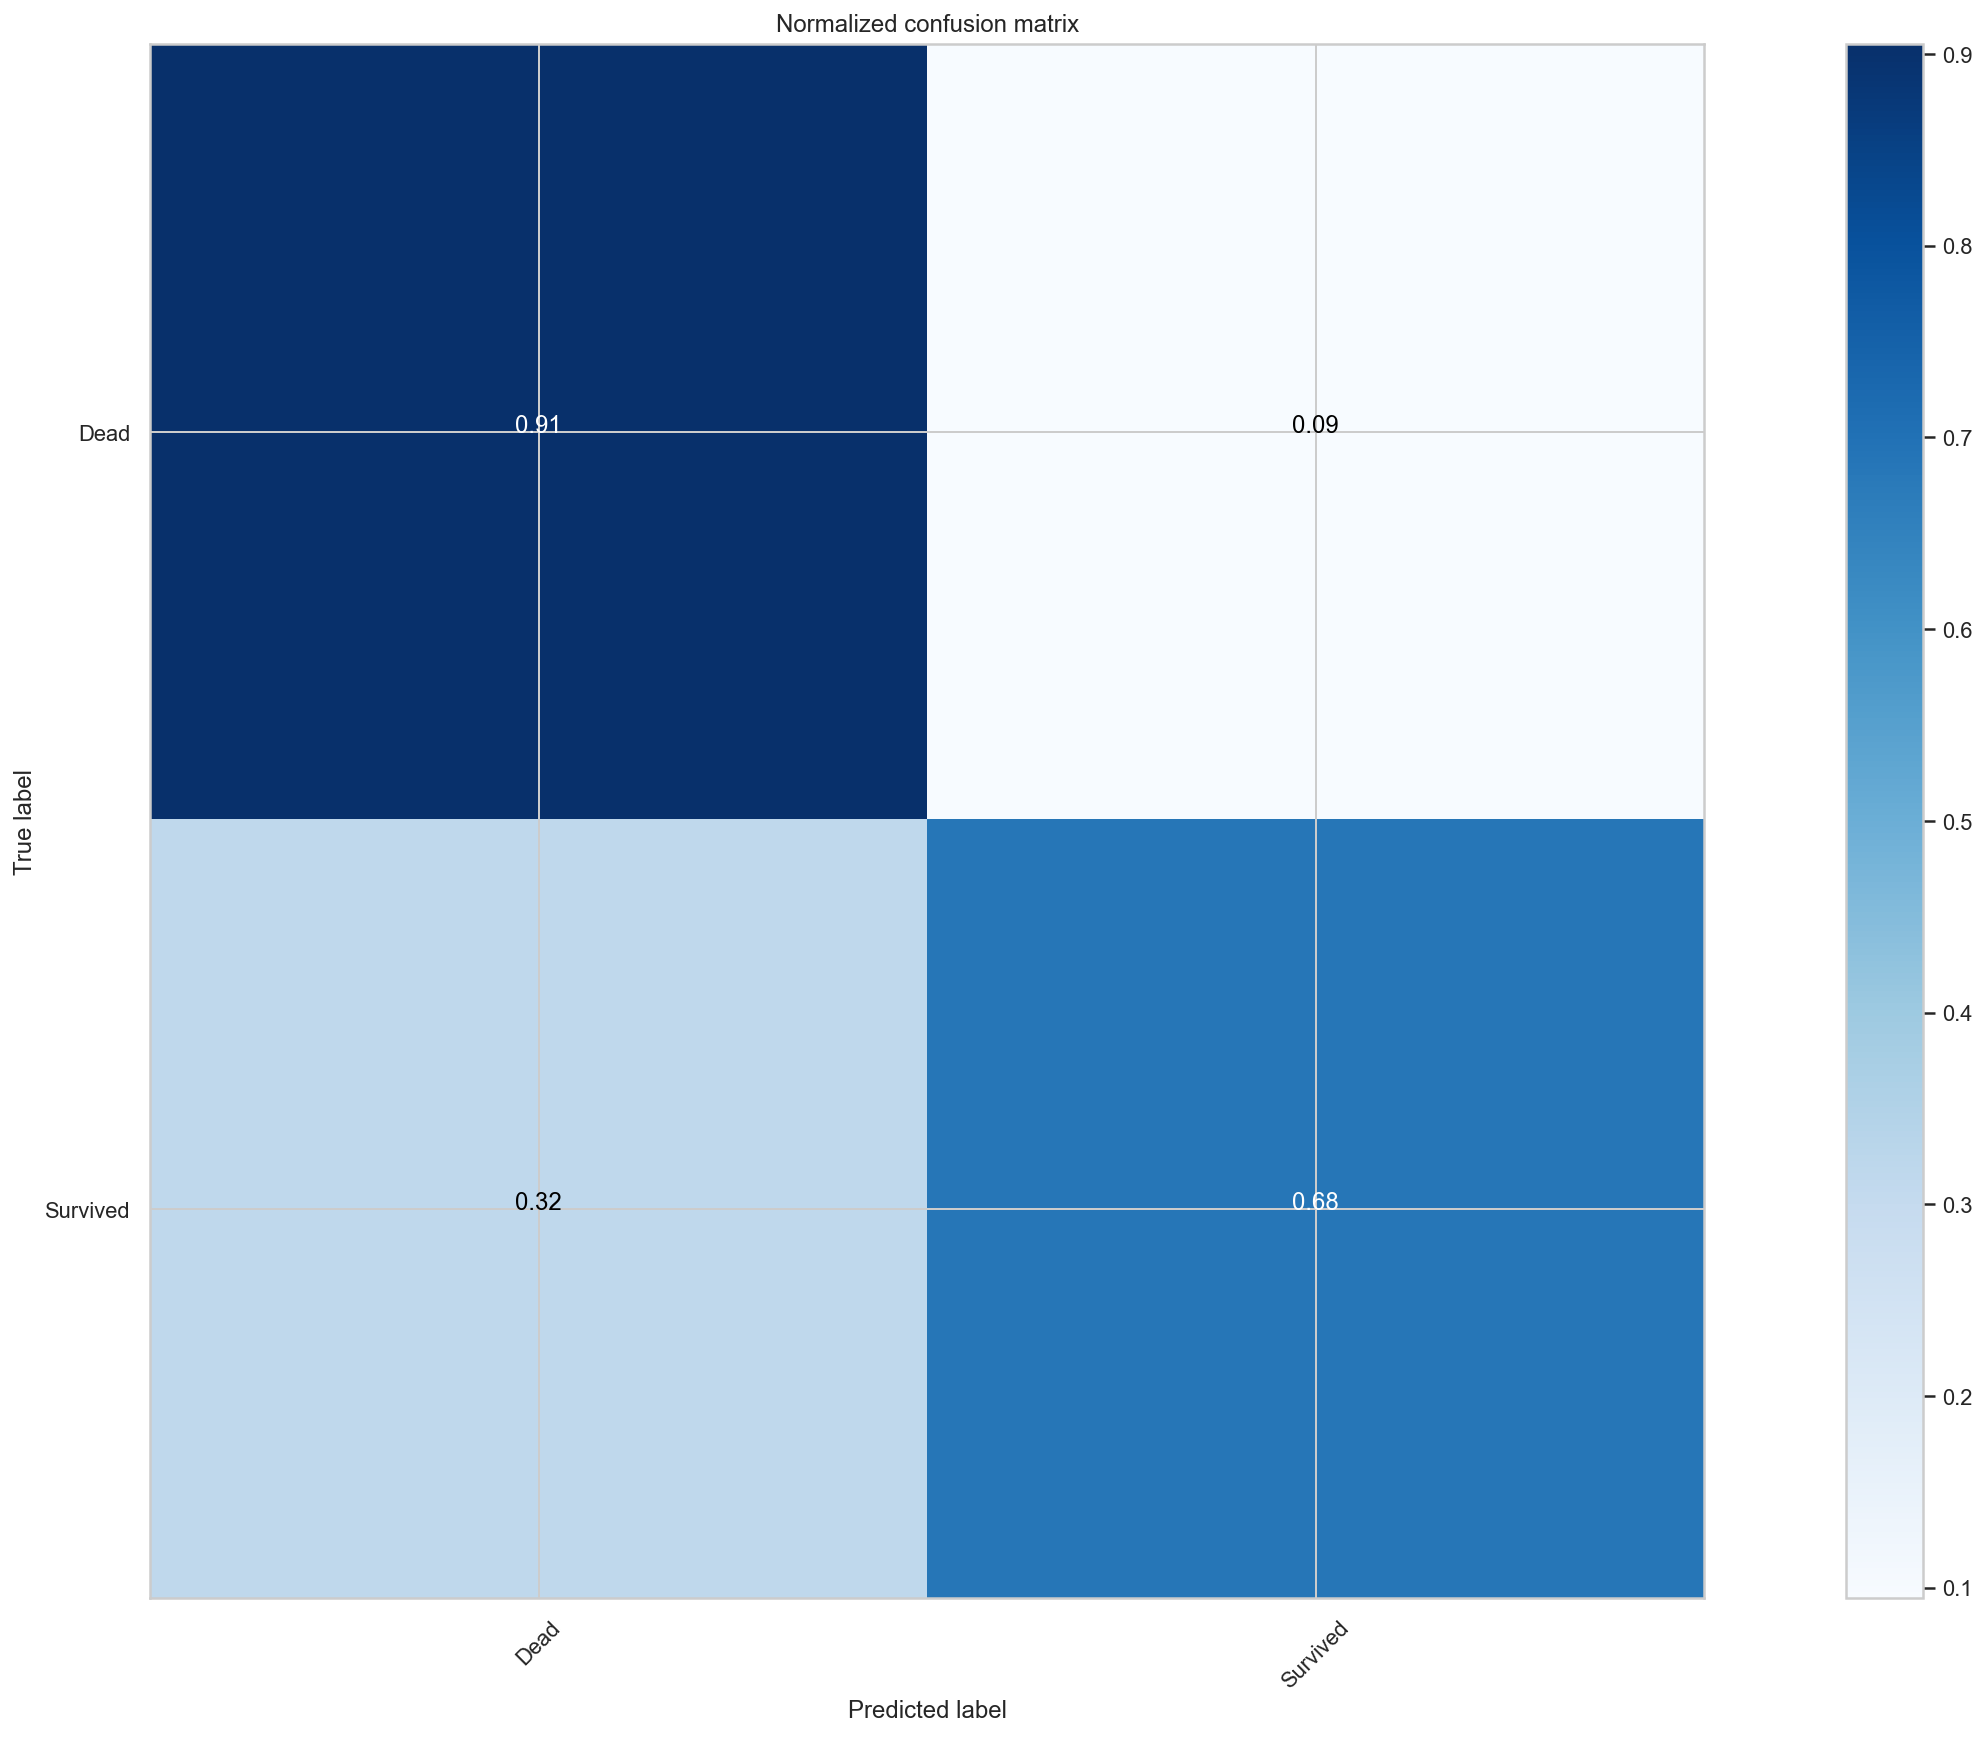

In [55]:
#Plot Accuracy Summary
#Credit: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(data1['Survived'], Tree_Predict)
np.set_printoptions(precision=2)

class_names = ['Dead', 'Survived']
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, 
                      title='Normalized confusion matrix')



<a id="ch9"></a>
# 5.12 Tune Model with Hyper-Parameters
When we used [sklearn Decision Tree (DT) Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), we accepted all the function defaults. This leaves opportunity to see how various hyper-parameter settings will change the model accuracy.  [(Click here to learn more about parameters vs hyper-parameters.)](https://www.youtube.com/watch?v=EJtTNboTsm8)

However, in order to tune a model, we need to actually understand it. That's why I took the time in the previous sections to show you how predictions work. Now let's learn a little bit more about our DT algorithm.

Credit: [sklearn](http://scikit-learn.org/stable/modules/tree.html#classification)

>**Some advantages of decision trees are:**
* Simple to understand and to interpret. Trees can be visualized.
* Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
* Able to handle both numerical and categorical data. Other techniques are usually specialized in analyzing datasets that have only one type of variable. See algorithms for more information.
* Able to handle multi-output problems.
* Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by Boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
* Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
* Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

> **The disadvantages of decision trees include:**
* Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
* The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.



Below are available hyper-parameters and [defintions](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier):
> class sklearn.tree.DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)


We will tune our model using [ParameterGrid](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html#sklearn.model_selection.ParameterGrid), [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV), and customized [sklearn scoring](http://scikit-learn.org/stable/modules/model_evaluation.html); [click here to learn more about ROC_AUC scores](http://www.dataschool.io/roc-curves-and-auc-explained/). We will then visualize our tree with [graphviz](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz).


In [56]:
#base model
dtree = tree.DecisionTreeClassifier(random_state = 0)
# dtree = XGBClassifier(random_state=0)
base_results = model_selection.cross_validate(dtree, data1[data1_x_bin], data1[Target], cv  = cv_split, return_train_score=True)
dtree.fit(data1[data1_x_bin], data1[Target])

print('BEFORE DT Parameters: ', dtree.get_params())
print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
# print("BEFORE DT Test w/bin set score min: {:.2f}". format(base_results['test_score'].min()*100))
print('-'*10)


#tune hyper-parameters: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
param_grid = {'criterion': ['gini', 'entropy'],  #scoring methodology; two supported formulas for calculating information gain - default is gini
              #'splitter': ['best', 'random'], #splitting methodology; two supported strategies - default is best
              'max_depth': [2,4,6,8,10,20], #max depth tree can grow; default is none
              #'min_samples_split': [2,5,10,.03,.05], #minimum subset size BEFORE new split (fraction is % of total); default is 2
              #'min_samples_leaf': [1,5,10,.03,.05], #minimum subset size AFTER new split split (fraction is % of total); default is 1
              #'max_features': [None, 'auto'], #max features to consider when performing split; default none or all
              'random_state': [0] #seed or control random number generator: https://www.quora.com/What-is-seed-in-random-number-generation
             }

print(list(model_selection.ParameterGrid(param_grid)))

#choose best model with grid_search: #http://scikit-learn.org/stable/modules/grid_search.html#grid-search
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
tune_model = model_selection.GridSearchCV(dtree, param_grid=param_grid, scoring = 'roc_auc', cv = cv_split,return_train_score=True)
tune_model.fit(data1[data1_x_bin], data1[Target])

#print(tune_model.cv_results_.keys())
#print(tune_model.cv_results_['params'])
print('AFTER DT Parameters: ', tune_model.best_params_)
#print(tune_model.cv_results_['mean_train_score'])
print("AFTER DT Training w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(tune_model.cv_results_['mean_test_score'])
print("AFTER DT Test w/bin score mean: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT Test w/bin score 3*std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)


#duplicates gridsearchcv
# tune_results = model_selection.cross_validate(tune_model, data1[data1_x_bin], data1[Target], cv  = cv_split)

# print('AFTER DT Parameters: ', tune_model.best_params_)
# print("AFTER DT Training w/bin set score mean: {:.2f}". format(tune_results['train_score'].mean()*100)) 
# print("AFTER DT Test w/bin set score mean: {:.2f}". format(tune_results['test_score'].mean()*100))
# print("AFTER DT Test w/bin set score min: {:.2f}". format(tune_results['test_score'].min()*100))
# print('-'*10)


BEFORE DT Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Training w/bin score mean: 89.51
BEFORE DT Test w/bin score mean: 82.09
BEFORE DT Test w/bin score 3*std: +/- 5.57
----------
[{'criterion': 'gini', 'max_depth': 2, 'random_state': 0}, {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}, {'criterion': 'gini', 'max_depth': 6, 'random_state': 0}, {'criterion': 'gini', 'max_depth': 8, 'random_state': 0}, {'criterion': 'gini', 'max_depth': 10, 'random_state': 0}, {'criterion': 'gini', 'max_depth': 20, 'random_state': 0}, {'criterion': 'entropy', 'max_depth': 2, 'random_state': 0}, {'criterion': 'entropy', 'max_depth': 4, 'random_state': 0}, {'criterion': 'entropy', 'max_depth': 6, 'random_state': 0}, {'c

<a id="ch10"></a>
## Feature Selection
As stated in the beginning, more predictor variables do not make a better model, but the right predictors do. So another step in data modeling is feature selection. [Sklearn](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has several options, we will use [recursive feature elimination (RFE) with cross validation (CV)](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV).

In [57]:
#base model
print('BEFORE DT RFE Training Shape Old: ', data1[data1_x_bin].shape) 
print('BEFORE DT RFE Training Columns Old: ', data1[data1_x_bin].columns.values)

print("BEFORE DT RFE Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT RFE Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT RFE Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)

dtree = tree.DecisionTreeClassifier(random_state=0)
# dtree = XGBClassifier()

#feature selection
dtree_rfe = feature_selection.RFECV(dtree, step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(data1[data1_x_bin], data1[Target])

#transform x&y to reduced features and fit new model
#alternative: can use pipeline to reduce fit and transform steps: http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
X_rfe = data1[data1_x_bin].columns.values[dtree_rfe.get_support()]
rfe_results = model_selection.cross_validate(dtree_rfe, data1[X_rfe], data1[Target], cv  = cv_split,return_train_score=True)

#print(dtree_rfe.grid_scores_)
print('AFTER DT RFE Training Shape New: ', data1[X_rfe].shape) 
print('AFTER DT RFE Training Columns New: ', X_rfe)

print("AFTER DT RFE Training w/bin score mean: {:.2f}". format(rfe_results['train_score'].mean()*100)) 
print("AFTER DT RFE Test w/bin score mean: {:.2f}". format(rfe_results['test_score'].mean()*100))
print("AFTER DT RFE Test w/bin score 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*100*3))
print('-'*10)


#tune rfe model
from sklearn.pipeline import Pipeline

rfe_tune_model = model_selection.GridSearchCV(dtree, param_grid=param_grid, scoring = 'roc_auc', cv = cv_split,return_train_score=True)
pipeline  = Pipeline([('feature_sele', dtree_rfe),('clf_cv', rfe_tune_model)])

pipeline.fit(data1[X_rfe], data1[Target])
rfe_tune_model=pipeline['clf_cv']

print('AFTER DT RFE Tuned Parameters: ', rfe_tune_model.best_params_)
#print(rfe_tune_model.cv_results_['mean_train_score'])
print("AFTER DT RFE Tuned Training w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_train_score'][tune_model.best_index_]*100)) 
#print(rfe_tune_model.cv_results_['mean_test_score'])
print("AFTER DT RFE Tuned Test w/bin score mean: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("AFTER DT RFE Tuned Test w/bin score 3*std: +/- {:.2f}". format(rfe_tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

BEFORE DT RFE Training Shape Old:  (891, 7)
BEFORE DT RFE Training Columns Old:  ['Sex_Code' 'Pclass' 'Embarked_Code' 'Title_Code' 'FamilySize'
 'AgeBin_Code' 'FareBin_Code']
BEFORE DT RFE Training w/bin score mean: 89.51
BEFORE DT RFE Test w/bin score mean: 82.09
BEFORE DT RFE Test w/bin score 3*std: +/- 5.57
----------
AFTER DT RFE Training Shape New:  (891, 6)
AFTER DT RFE Training Columns New:  ['Sex_Code' 'Pclass' 'Title_Code' 'FamilySize' 'AgeBin_Code'
 'FareBin_Code']
AFTER DT RFE Training w/bin score mean: 85.97
AFTER DT RFE Test w/bin score mean: 81.34
AFTER DT RFE Test w/bin score 3*std: +/- 6.43
----------
AFTER DT RFE Tuned Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
AFTER DT RFE Tuned Training w/bin score mean: 89.39
AFTER DT RFE Tuned Test w/bin score mean: 87.34
AFTER DT RFE Tuned Test w/bin score 3*std: +/- 6.21
----------


### Gini score vs. Entropy
if $p_j$ is the probability of belonging to class j, then:

$Entropy = -\sum_jp_j\log_2p_j$. For two classes, this gives a number between 0 and 1 (=max)

$Gini = 1-\sum_jp_j^2$. For two classes, This gives a number between 0 and 0.5 (=max)

The maximum of both happens when the prob. of classes is uniform (means more information and less assurance)

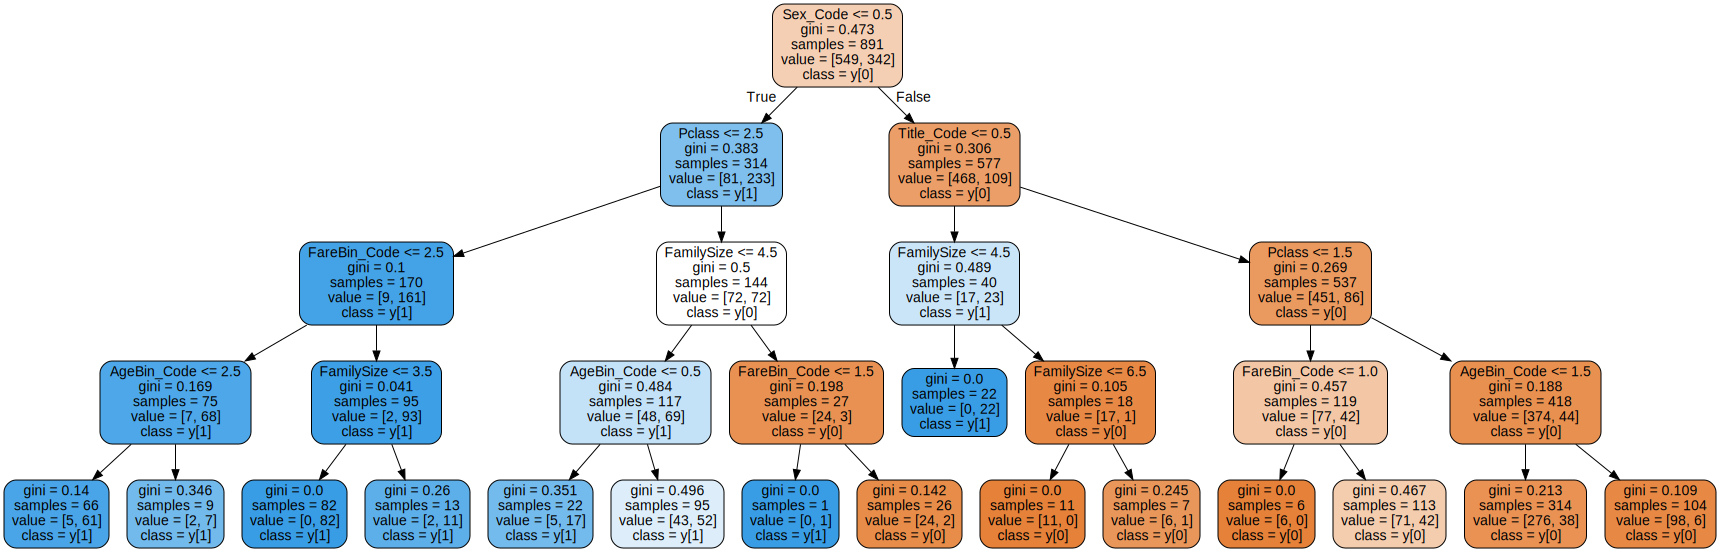

In [58]:
#Graph MLA version of Decision Tree: http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html
#in conde install by 'conda install python-graphviz'
import graphviz 
dot_data = tree.export_graphviz(pipeline['clf_cv'].best_estimator_
                                , out_file=None, 
                                feature_names = X_rfe, class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data) 
graph

### Other feature selection techniques

Generally, statistical tests like F-test or $\chi^2$-test or t-test are used to measure similarity of two distribution or goodness of a fit. They are commonly used to determine whether there is a statistically significant difference (i.e., a magnitude of difference that is unlikely to be due to chance alone) between the expected frequencies and the observed frequencies in one or more categories of a so-called contingency table.

#### f_classif: https://en.wikipedia.org/wiki/F-test
It is used for analysis of variance. It tells you which feature is more discriminating according to classes in the target. 

#### chi2: https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test

$H_{0}$ = there is no difference between the distributions (can be rejected).

$H_{1}$ = there is a difference between the distributions (can be accepted, both with the selected level of confidence).

If the test statistic falls below the threshold $\chi^2$ value, then no clear conclusion can be reached, and the null hypothesis is sustained (we failed to reject the null hypothesis), but not necessarily accepted.

#### p-values
The p-value or probability value is the probability of obtaining test results at least as extreme as the results actually observed during the test, assuming that the null hypothesis is correct. In other words, a p-value is a measure of the probability that an observed difference could have occurred just by random chance.

In our feature selection discussions, $H_{0}$ is a feature in dataset and the target class are independent, and $H_{1}$ is the target class depends on that feature. So p-value is the probability of $H_{0}$ being correct. To calculate this probability we use statistical tests (e.g., $\chi^2$-test for categorical features or t-test for numerical features).

Generally, smaller p-values means the feature has a significant imapct on the target. It's common to say p-value less than 0.05 is significant to consider.

For simplified description watch: https://www.youtube.com/watch?v=I10q6fjPxJ0

Index(['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize',
       'AgeBin_Code', 'FareBin_Code'],
      dtype='object')
[3.72e+02 1.15e+02 2.57e+01 6.21e+00 2.46e-01 1.76e+00 8.75e+01]
[1.41e-69 2.54e-25 4.81e-07 1.29e-02 6.20e-01 1.85e-01 6.64e-20]
[[1 3 2 3 0]
 [0 1 0 4 3]
 [0 3 2 2 1]
 [0 1 2 4 3]
 [1 3 2 3 1]]
--------------------------------------------------
Index(['Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize',
       'AgeBin_Code', 'FareBin_Code'],
      dtype='object')
[92.7  30.87 10.2   1.81  0.34  0.9  66.6 ]
[6.08e-22 2.75e-08 1.40e-03 1.78e-01 5.62e-01 3.42e-01 3.32e-16]
[[1 3 2 3 0]
 [0 1 0 4 3]
 [0 3 2 2 1]
 [0 1 2 4 3]
 [1 3 2 3 1]]
--------------------------------------------------


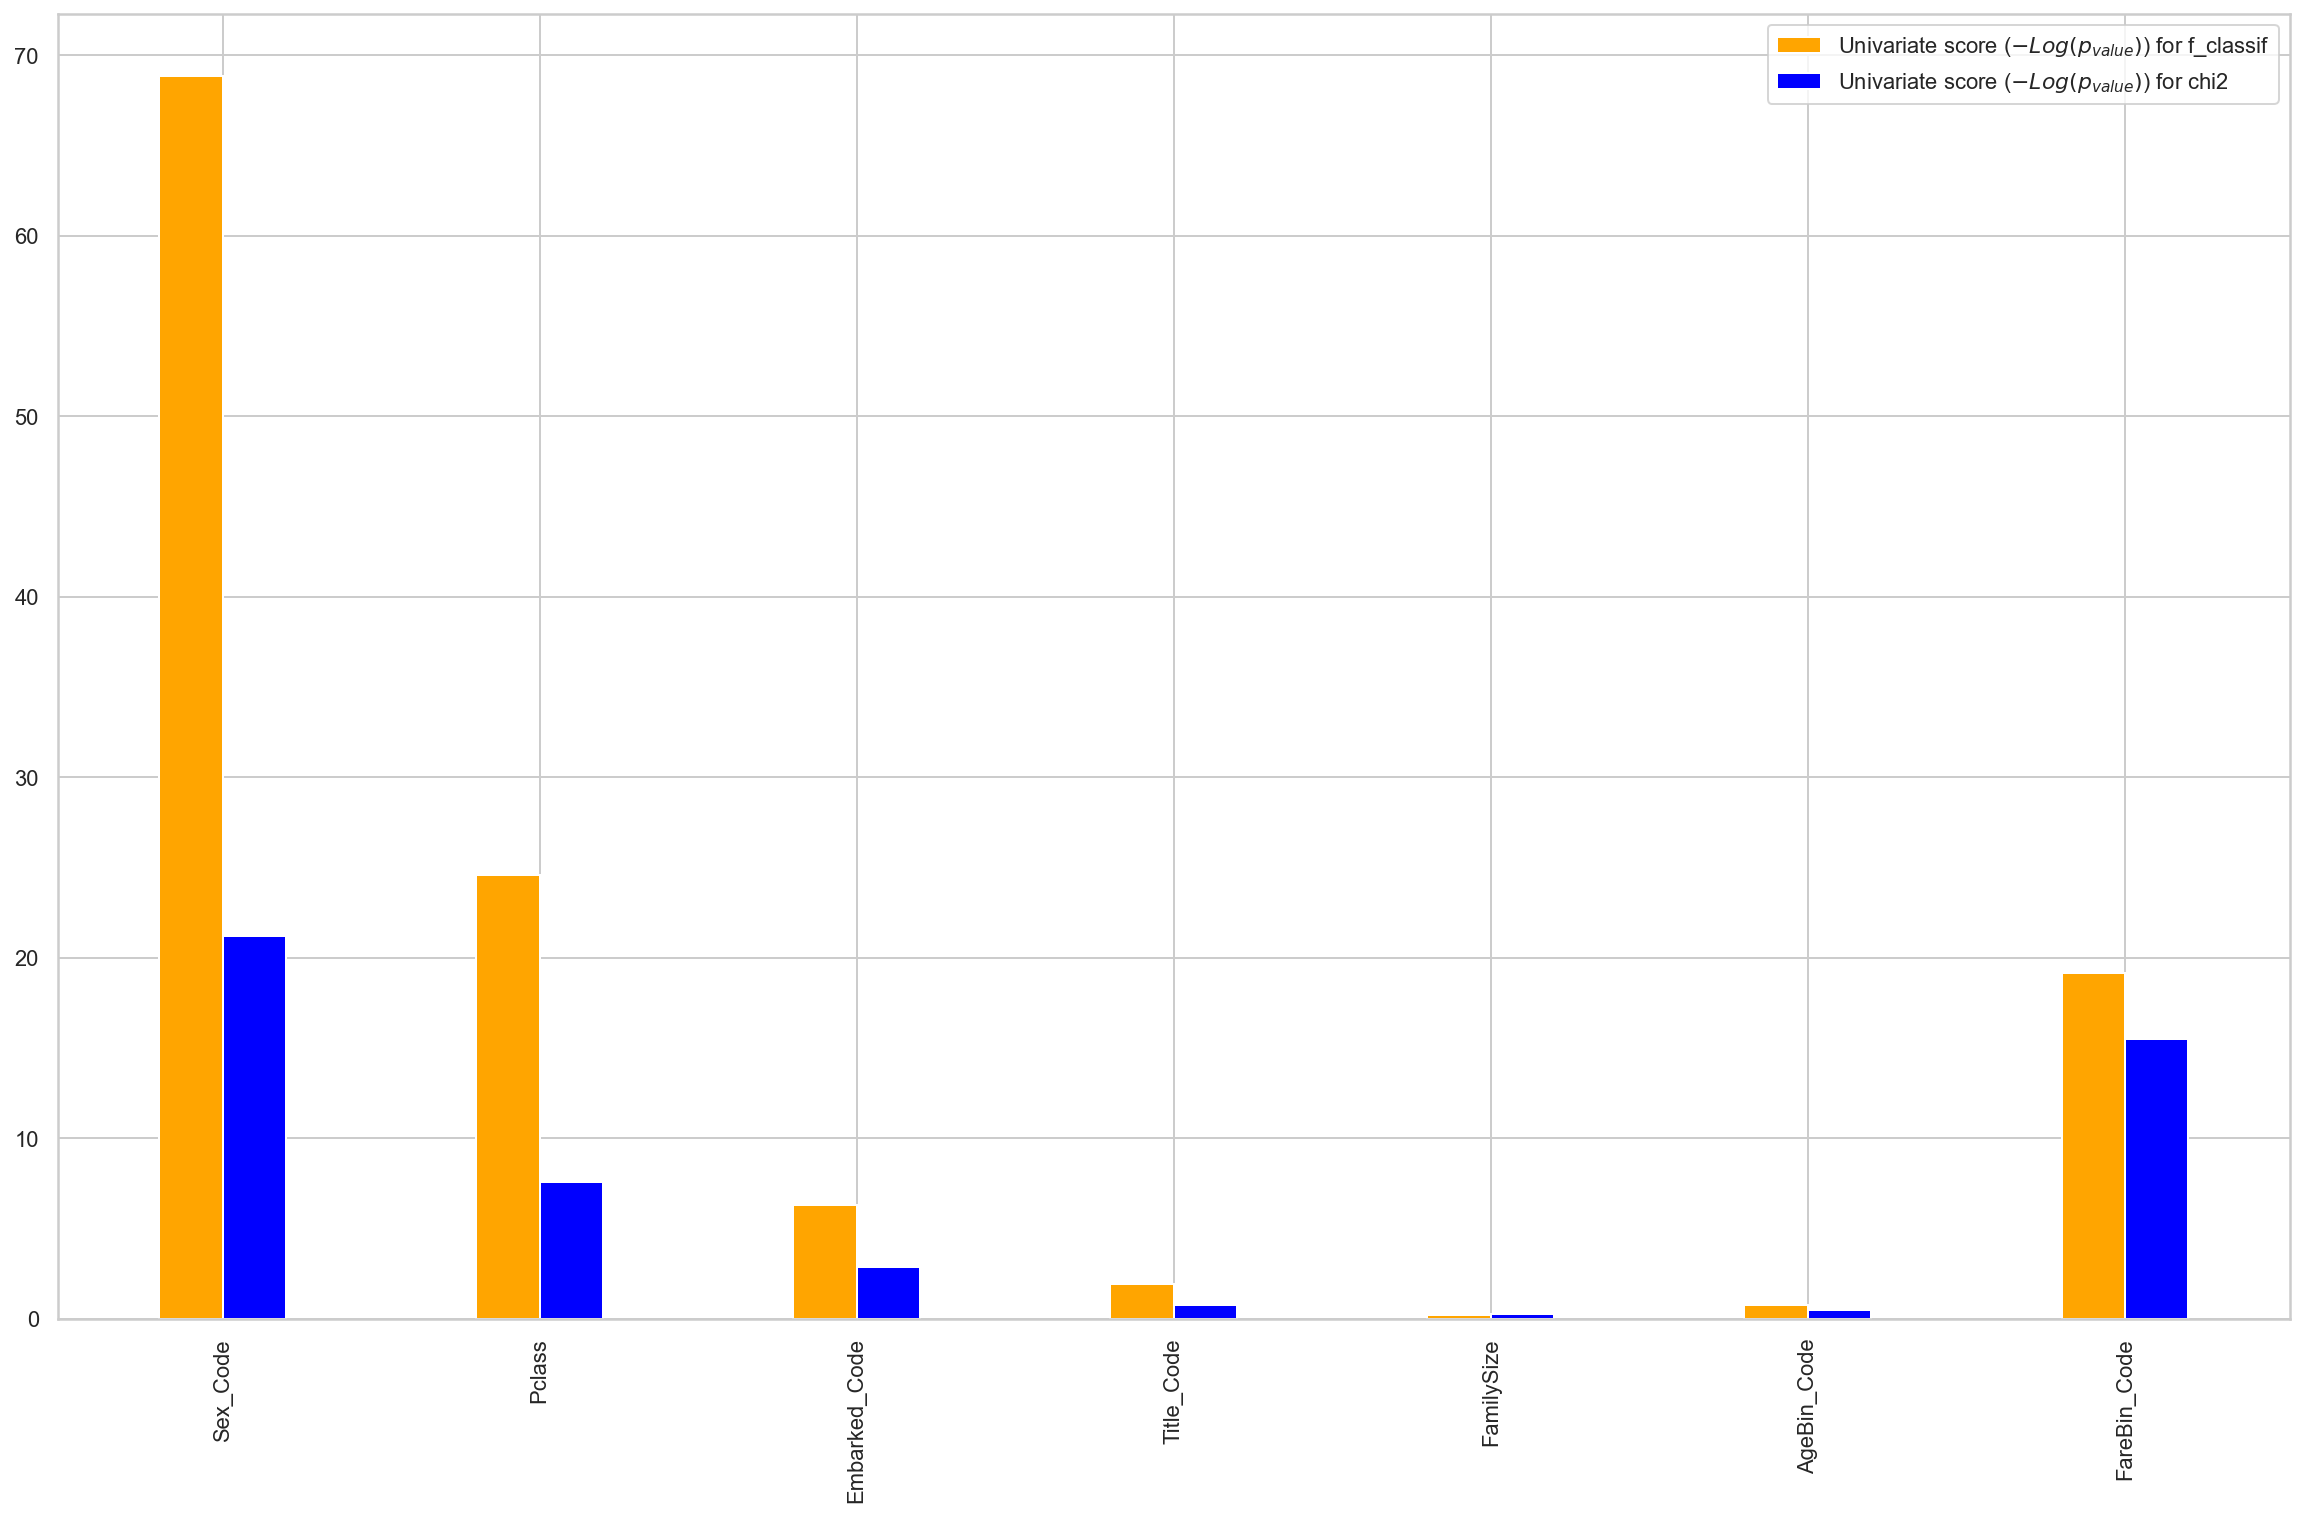

In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=f_classif, k=5)
fc = test.fit(data1[data1_x_bin], data1[Target])
print(data1[data1_x_bin].columns)
print(fc.scores_)
print(fc.pvalues_)
features = fc.transform(data1[data1_x_bin])
# df = pd.DataFrame(features)
# print(df)
print(features[0:5,:])
print('-'*50)

test = SelectKBest(score_func=chi2, k=5)
chi = test.fit(data1[data1_x_bin], data1[Target])
print(data1[data1_x_bin].columns)
print(chi.scores_)
print(chi.pvalues_)
features = chi.transform(data1[data1_x_bin])
# df = pd.DataFrame(features)
# print(df)
print(features[0:5,:])
print('-'*50)

X_indices = np.arange(data1[data1_x_bin].shape[-1])

scores = -np.log10(fc.pvalues_)
# scores /= scores.max()
plt.bar(X_indices - .1, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$) for f_classif', color='orange')

scores = -np.log10(chi.pvalues_)
# scores /= scores.max()
plt.bar(X_indices + .1, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$) for chi2', color='blue')

plt.xticks(X_indices, data1[data1_x_bin].columns, rotation='vertical')
plt.legend()

Text(0.5, 0, 'Relative Gini Importance')

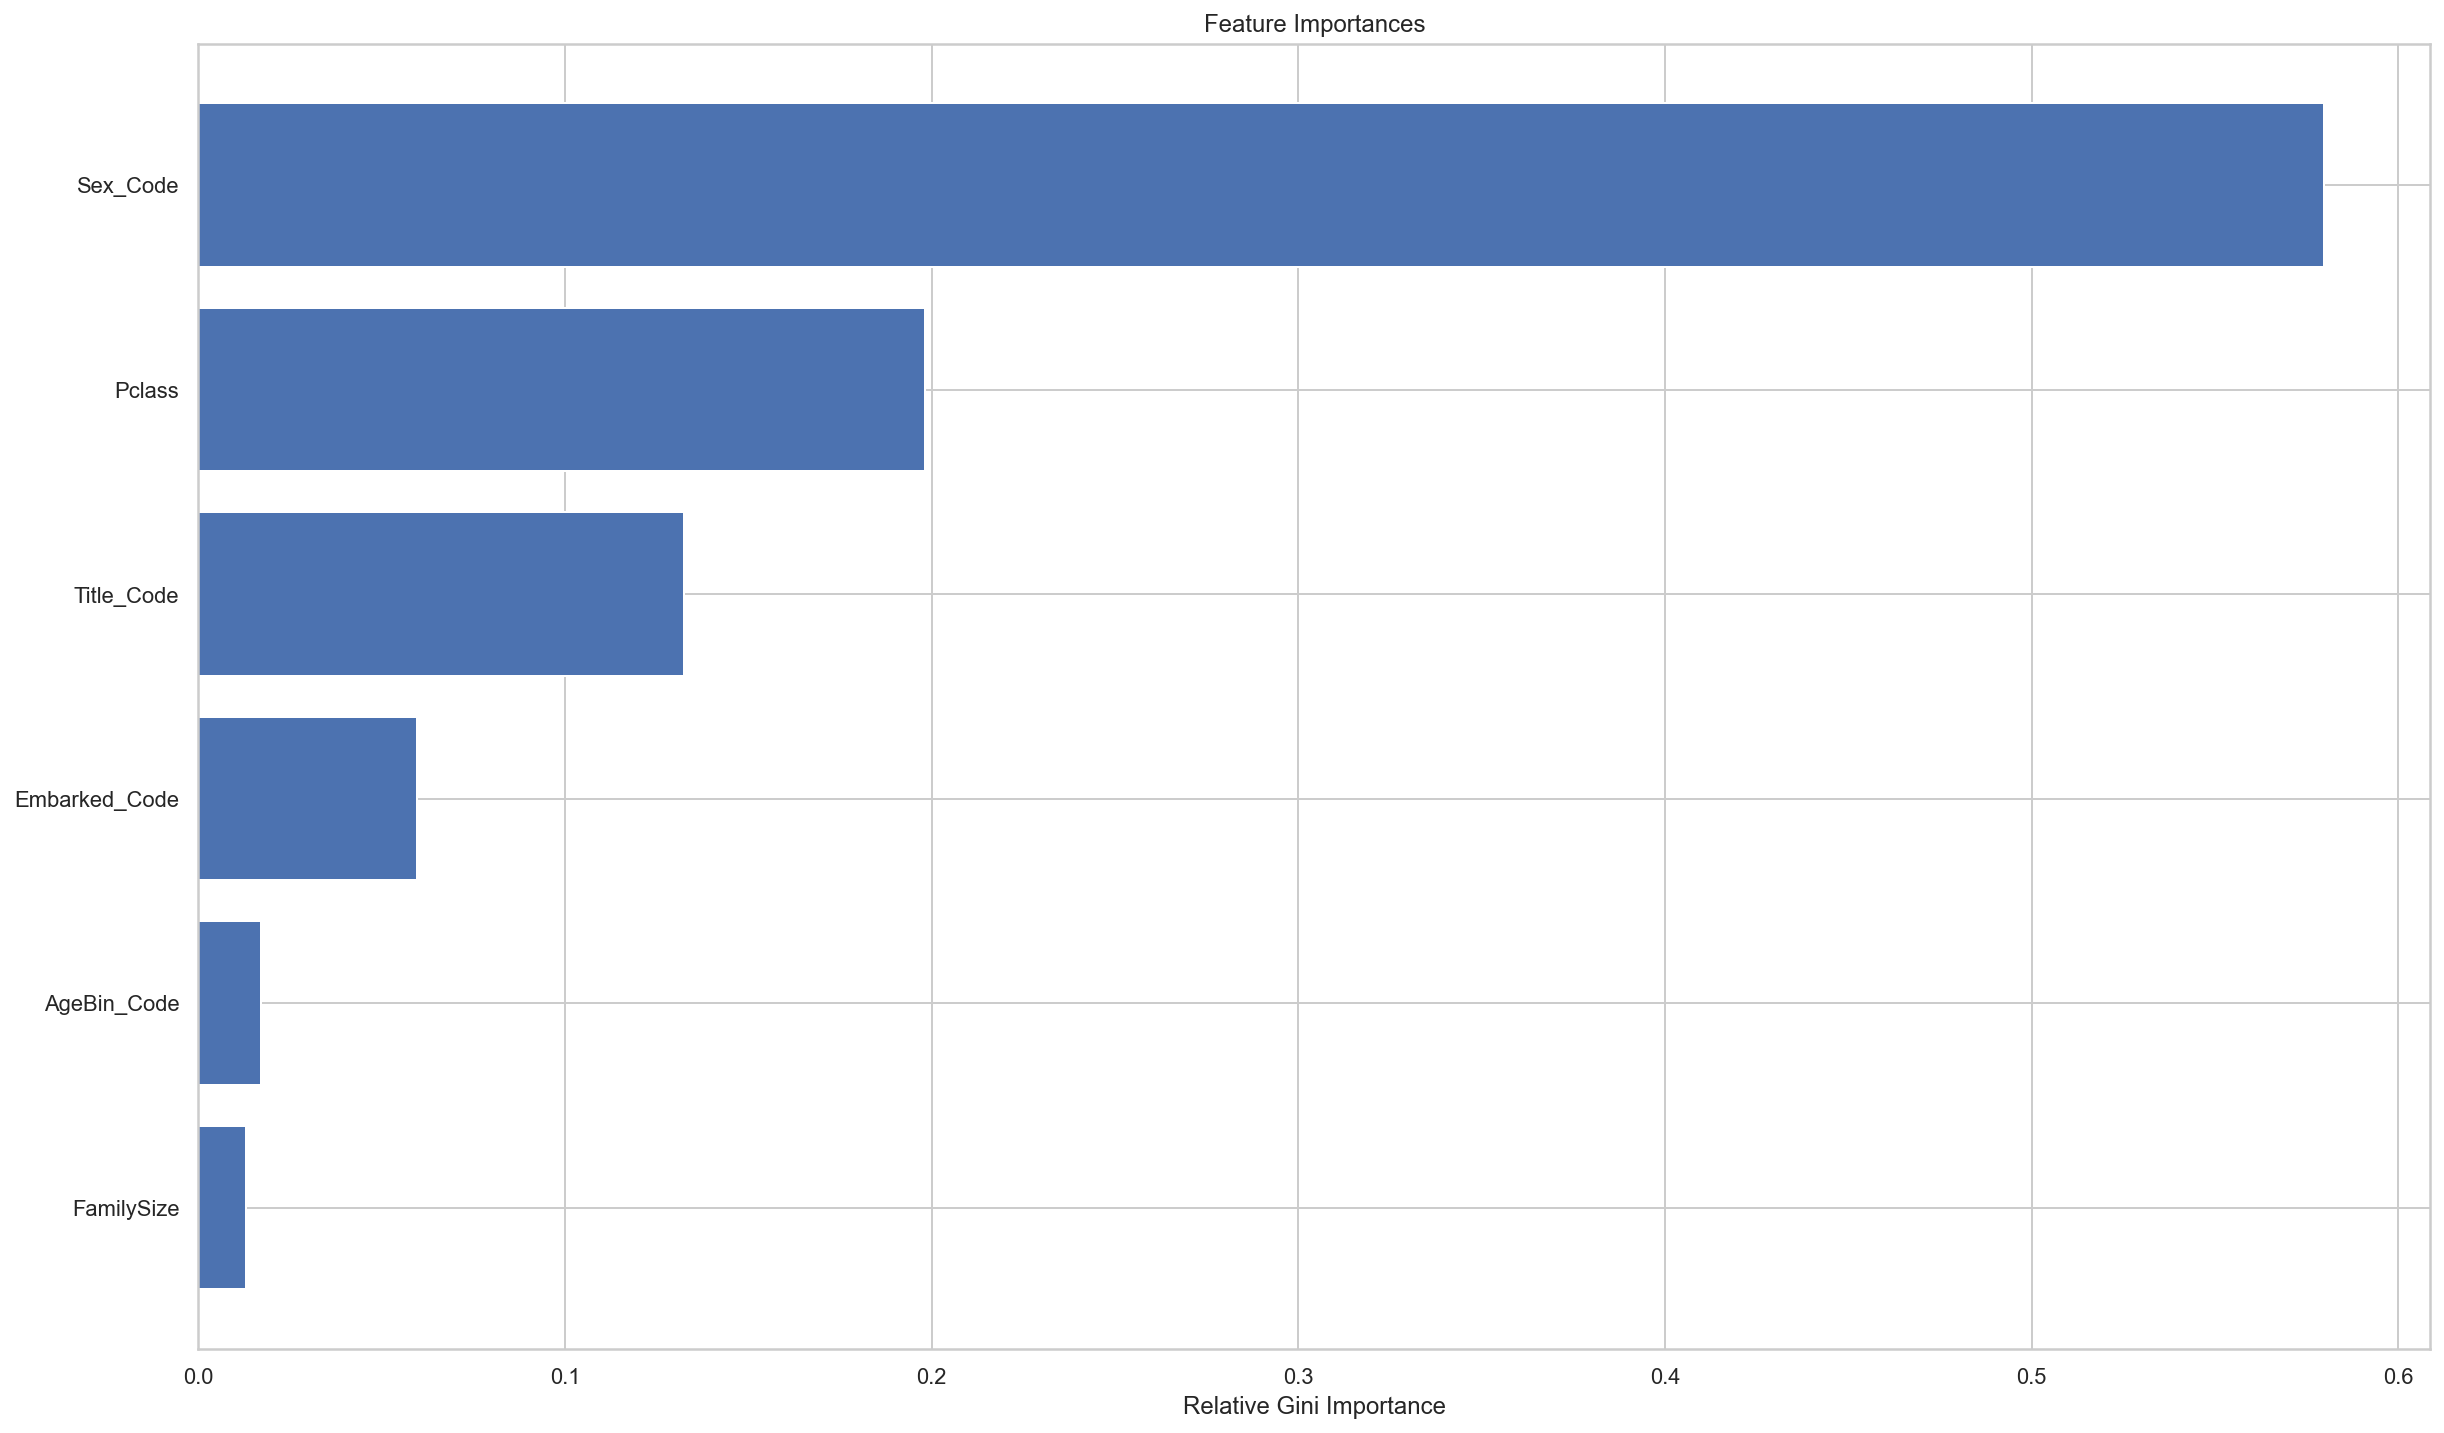

In [60]:
# for name, importance in zip(data1[data1_x_bin].columns, pipeline['clf_cv'].best_estimator_.feature_importances_):
#     print(name, "=", importance)

columns = data1[data1_x_bin].columns
importances = pipeline['clf_cv'].best_estimator_.feature_importances_ # It's the (normalized) total reduction of Gini importance
# importances
indices = np.argsort(importances)
# indices
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), columns[indices])
plt.xlabel('Relative Gini Importance')

### Combine multiple classifer with Voting mechanism

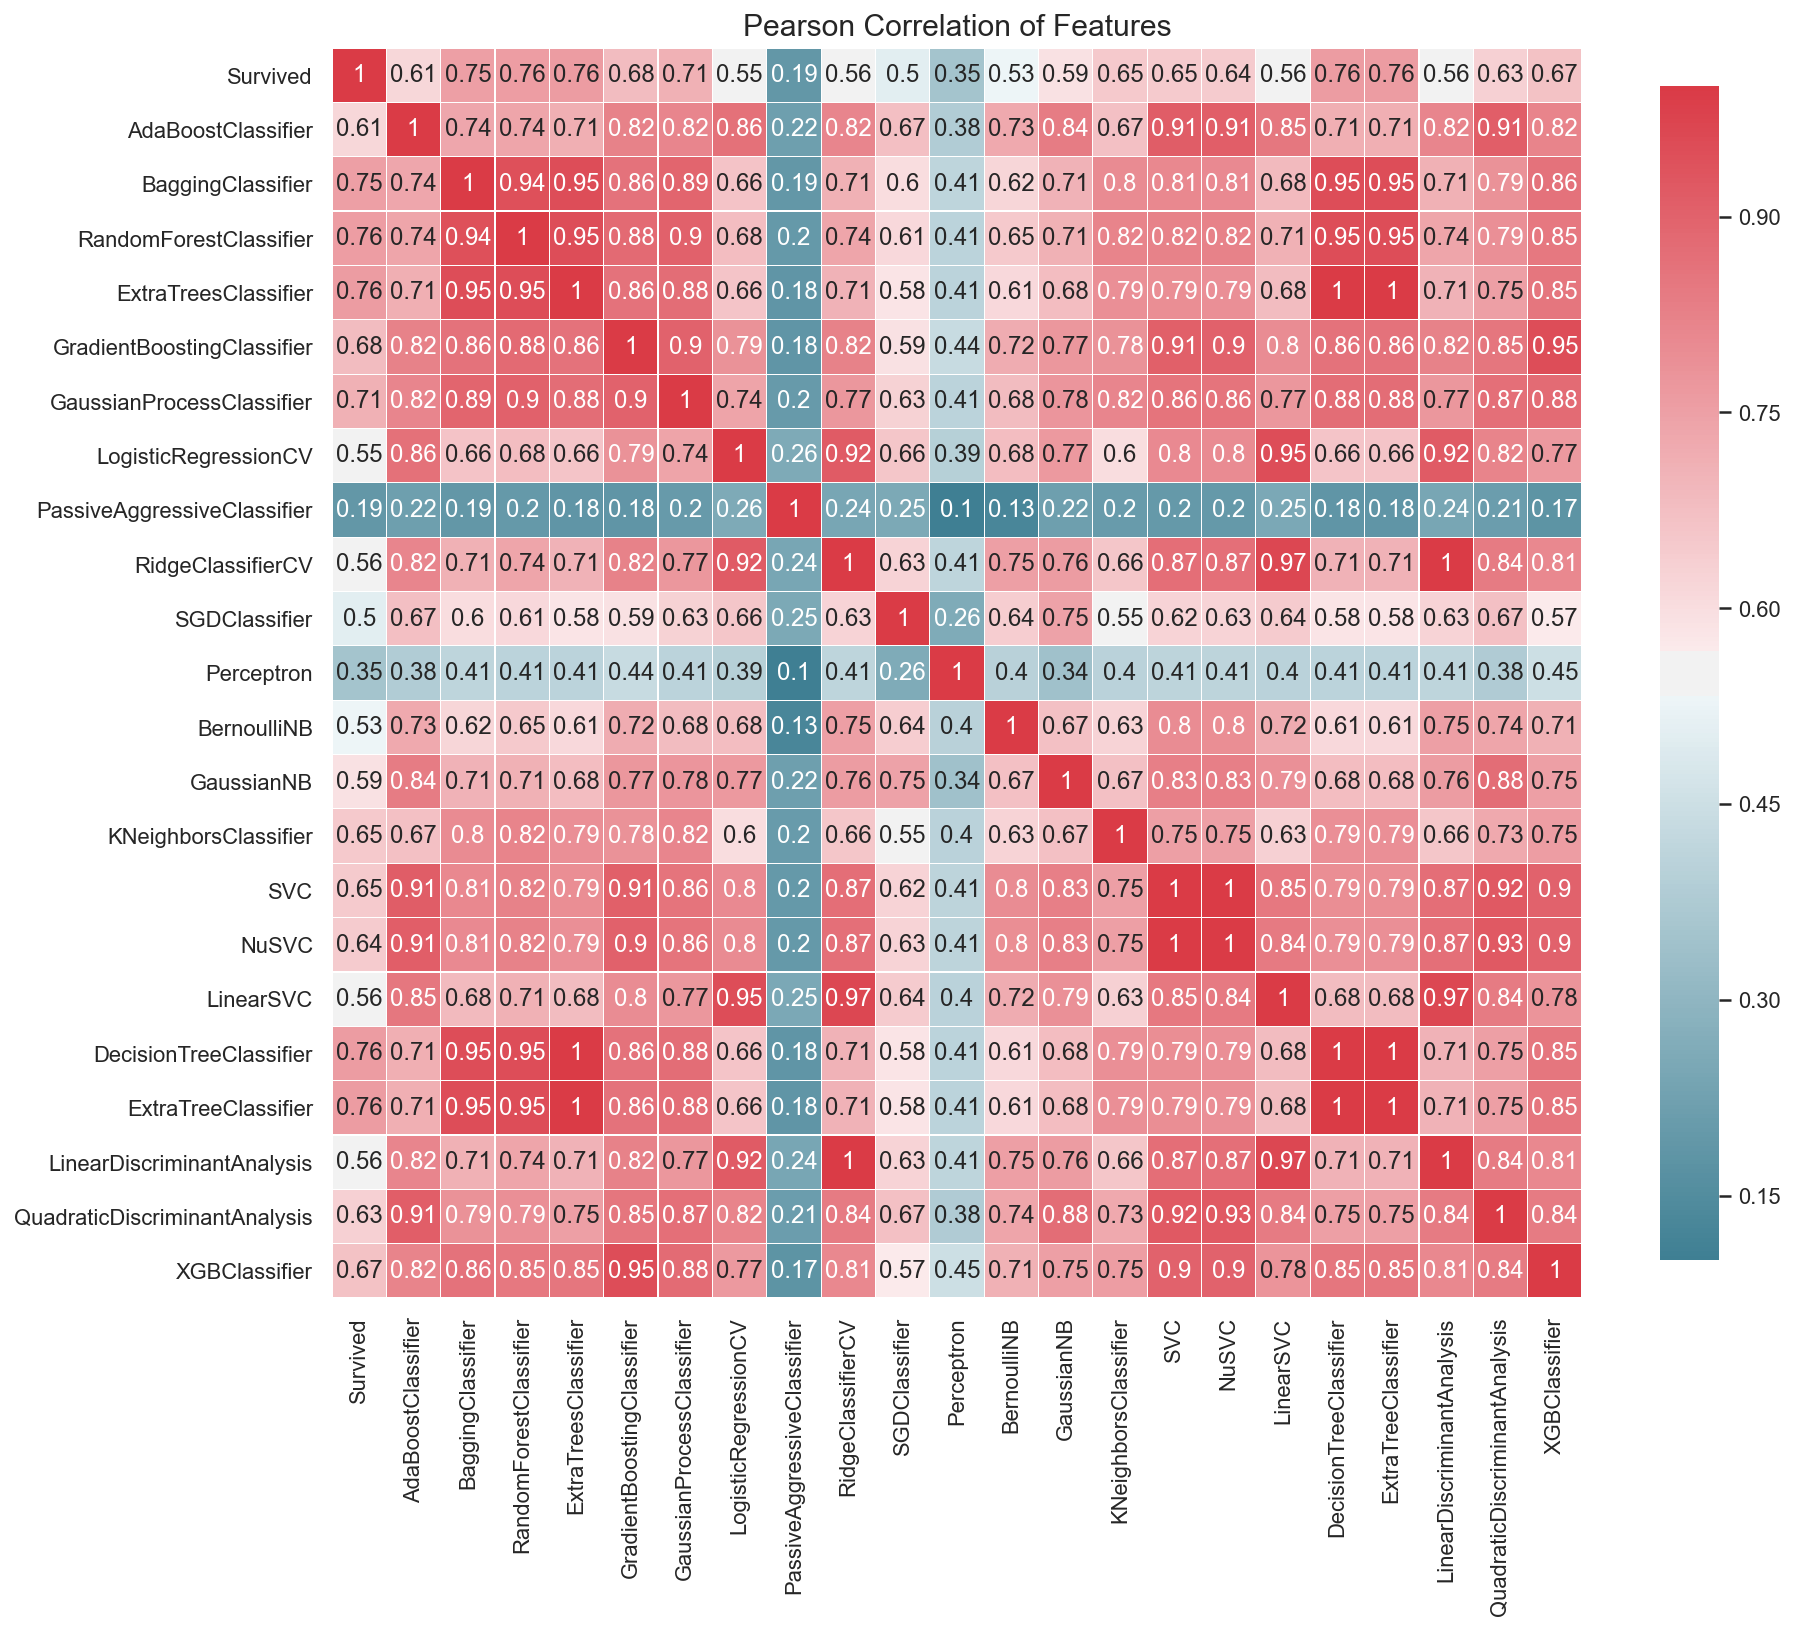

In [61]:
# Sometimes it is a good idea to combine some classifiers to build a stronger classifier using voting
correlation_heatmap(MLA_predict)

In [62]:
#why choose one model, when you can pick them all with voting classifier
#http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
#removed models w/o attribute 'predict_proba' required for vote classifier and models with a 1.0 correlation to another model
vote_est = [
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    ('lr', linear_model.LogisticRegressionCV()),
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    ('knn', neighbors.KNeighborsClassifier()),
    ('svc', svm.SVC(probability=True)),
    ('xgb', XGBClassifier())
]


#Hard Vote or majority rules
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data1[data1_x_bin], data1[Target], cv  = cv_split, return_train_score=True)
vote_hard.fit(data1[data1_x_bin], data1[Target])

print("Hard Voting Training w/bin score mean: {:.2f}". format(vote_hard_cv['train_score'].mean()*100)) 
print("Hard Voting Test w/bin score mean: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Hard Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)


#Soft Vote or weighted probabilities
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft') # Soft: max weighted sum of the probabilities of classes
vote_soft_cv = model_selection.cross_validate(vote_soft, data1[data1_x_bin], data1[Target], cv  = cv_split, return_train_score=True)
vote_soft.fit(data1[data1_x_bin], data1[Target])

print("Soft Voting Training w/bin score mean: {:.2f}". format(vote_soft_cv['train_score'].mean()*100)) 
print("Soft Voting Test w/bin score mean: {:.2f}". format(vote_soft_cv['test_score'].mean()*100))
print("Soft Voting Test w/bin score 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)


Hard Voting Training w/bin score mean: 86.55
Hard Voting Test w/bin score mean: 82.46
Hard Voting Test w/bin score 3*std: +/- 4.62
----------
Soft Voting Training w/bin score mean: 87.27
Soft Voting Test w/bin score mean: 82.20
Soft Voting Test w/bin score 3*std: +/- 4.51
----------


It is more approperiate to apply Voting after parameter tuning of basic models

## Handle other feature types

### Scaling numeric features
The algorithms which use **Euclidean Distance** measure are sensitive to magnitudes. In this case, feature scaling helps to weigh all the features equally.

Examples of Algorithms where Feature Scaling matters:
1. K-Means uses the Euclidean distance measure here feature scaling matters.
2. K-Nearest-Neighbours also require feature scaling.
3. Principal Component Analysis (PCA): Tries to get the feature with maximum variance.
4. (Stochastic) Gradient Descent: Propoer scaling impacts the convergence (read https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re).

Naive Bayes, Linear Discriminant Analysis, and Tree-Based models are not affected by feature scaling.

Read all kinds of scaling and trasnformations here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [63]:
from sklearn.preprocessing import StandardScaler #Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler() 
  
# To scale data 
scaler.fit(data1[['Fare','Age']])
print(scaler.mean_)
new_np = scaler.transform(data1[['Fare','Age']])
new_df = pd.DataFrame(new_np,columns=['Fare','Age'])
# new_df.mean()
new_df.head()

[32.2  29.36]


,Fare,Age
0,-0.502445,-0.565736
1,0.786845,0.663861
2,-0.488854,-0.258337
3,0.420730,0.433312
4,-0.486337,0.433312


In [67]:
from sklearn.preprocessing import Normalizer #Each sample is rescaled independently of other samples so that its norm (l1 or l2) equals one.
scaler = Normalizer() 
  
# To scale data 
scaler.fit(data1[['Fare','Age']])
new_np = scaler.transform(data1[['Fare','Age']])
new_df = pd.DataFrame(new_np,columns=['Fare','Age'])
# new_df.head()
new_df.max()
new_df.min()

Fare    0.00000
Age     0.00607
dtype: float64

#### Log transformation (to deal with skewed data)
Figure shows an example of how a log transformation can make patterns more visible. Both graphs plot the brain weight of animals as a function of their body weight. The raw weights are shown in the upper graph; the log-transformed weights are plotted in the lower graph.

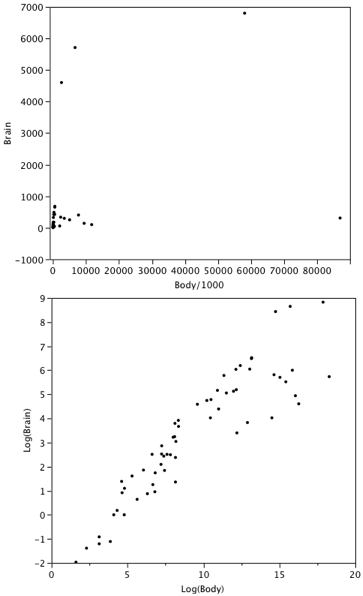

In [53]:
from sklearn.preprocessing import FunctionTransformer #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html#sklearn.preprocessing.FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True) #np.log1p(x)=ln(1+x)
X = np.array([[0.01, 1.0], [2.1, 3.5], [200.2, 300.0006]])
transformer.transform(X)

array([[0.01, 0.69],
       [1.13, 1.5 ],
       [5.3 , 5.71]])

### Handling Date and Time
Whenever you have date and time features, you may have periodic patterns.
In general, there are several common time frames that trends occur over:
+ absolute_time
+ day_of_year
+ day_of_week
+ month_of_year
+ hour_of_day
+ minute_of_hour

Look for trends in all of these time frames.

Sometimes, you want to preserve the cyclical nature of your data (time 23:00 is closer to 0:00 than 2:00).
The trick is to use sin and cosin transformation of absolut time instead of time (read https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/)


Also look for special events. For example you may see rare but persistent time based trends like a national emergency or a special holiday.
These often require that you cross reference your data against some external source that maps events to time.

You may need to apply time zone to your data (make sure you know in what time zone the data is captured).